In [ ]:
import pandas as pd
import numpy as np



# Load the dataset, specifying the error_bad_lines parameter to skip problematic lines
combined_Data = pd.read_csv('combined_data.csv')
print(combined_Data.head())

                  date                                       cleaned_text  \
0  2021-02-05 10:52:04  Weekend Read Keen learn crypto asset check rea...   
1  2021-02-05 10:53:49  bitcoin eth bullish setup high BTC great daily...   
2  2021-02-05 10:54:52             perl insist increase month bitcoin btc   
3  2021-02-05 10:57:05  amazing monopoly Crypto cryptocurrency cryptoc...   
4  2021-02-05 10:58:03  juld bnb Binance bsc binancesmartchain BTC bit...   

   hour day_of_week  cluster     pca_1     pca_2     pca_3  neg    neu    pos  \
0    10      Friday        0 -0.039006  0.019596 -0.003517  0.0  0.643  0.357   
1    10      Friday        0 -0.008711 -0.044779  0.015170  0.0  0.687  0.313   
2    10      Friday        0 -0.007222 -0.111557  0.024533  0.0  0.685  0.315   
3    10      Friday        0 -0.004758  0.010048 -0.080205  0.0  0.678  0.322   
4    10      Friday        0  0.029576 -0.128855 -0.120270  0.0  1.000  0.000   

   compound sentiment     Timestamp      Open     

In [ ]:
combined_Data.shape

(498870, 20)

In [ ]:
columns_to_drop = ['cluster', 'pca_1', 'pca_2', 'pca_3' , 'Timestamp' , 'datetime']
combined_Data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
print(combined_Data.head()) # Print the first few rows of the combined_Data DataFrame

                  date                                       cleaned_text  \
0  2021-02-05 10:52:04  Weekend Read Keen learn crypto asset check rea...   
1  2021-02-05 10:53:49  bitcoin eth bullish setup high BTC great daily...   
2  2021-02-05 10:54:52             perl insist increase month bitcoin btc   
3  2021-02-05 10:57:05  amazing monopoly Crypto cryptocurrency cryptoc...   
4  2021-02-05 10:58:03  juld bnb Binance bsc binancesmartchain BTC bit...   

   hour day_of_week  neg    neu    pos  compound sentiment      Open  \
0    10      Friday  0.0  0.643  0.357    0.6124  positive  37293.28   
1    10      Friday  0.0  0.687  0.313    0.6249  positive  37268.83   
2    10      Friday  0.0  0.685  0.315    0.3182  positive  37260.13   
3    10      Friday  0.0  0.678  0.322    0.5859  positive  37234.86   
4    10      Friday  0.0  1.000  0.000    0.0000   neutral  37169.45   

       High       Low     Close    Volume  
0  37295.88  37275.46  37295.88  2.707914  
1  37271.56  372

In [ ]:
# Get DataFrame info
print(combined_Data.info())

# Or get description of numerical columns
print(combined_Data.describe(include=['int64', 'float64']))

# And description of categorical columns
print(combined_Data.describe(include=['object', 'category', 'bool']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498870 entries, 0 to 498869
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          498870 non-null  object 
 1   cleaned_text  498870 non-null  object 
 2   hour          498870 non-null  int64  
 3   day_of_week   498870 non-null  object 
 4   neg           498870 non-null  float64
 5   neu           498870 non-null  float64
 6   pos           498870 non-null  float64
 7   compound      498870 non-null  float64
 8   sentiment     498870 non-null  object 
 9   Open          498870 non-null  float64
 10  High          498870 non-null  float64
 11  Low           498870 non-null  float64
 12  Close         498870 non-null  float64
 13  Volume        498870 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 53.3+ MB
None
                hour            neg            neu            pos  \
count  498870.000000  498870.000000  498870.0000

In [ ]:

# Or get description of numerical columns
print(combined_Data.describe(include=['int64', 'float64']))

# And description of categorical columns
print(combined_Data.describe(include=['object', 'category', 'bool']))

                hour            neg            neu            pos  \
count  498870.000000  498870.000000  498870.000000  498870.000000   
mean       12.542169       0.056859       0.794237       0.148902   
std         6.515703       0.117554       0.201006       0.179390   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000       0.000000       0.652000       0.000000   
50%        13.000000       0.000000       0.813000       0.091000   
75%        18.000000       0.060000       1.000000       0.263000   
max        23.000000       1.000000       1.000000       1.000000   

            compound           Open           High            Low  \
count  498870.000000  498870.000000  498870.000000  498870.000000   
mean        0.179106   32926.411344   32949.726742   32902.423781   
std         0.400182   11289.547889   11301.390974   11277.803578   
min        -0.991400   17813.920000   17838.410000   17801.930000   
25%         0.000000   23348.0000

In [ ]:
# Display sentiment and Close price for first 30 rows
for i, row in enumerate(combined_Data[['sentiment', 'Close']].head(30).itertuples(), 1):
    print(f"{i}. Sentiment: {row.sentiment} | Close Price: {row.Close}")

1. Sentiment: positive | Close Price: 37295.88
2. Sentiment: positive | Close Price: 37252.64
3. Sentiment: positive | Close Price: 37271.04
4. Sentiment: positive | Close Price: 37169.4
5. Sentiment: neutral | Close Price: 37162.73
6. Sentiment: positive | Close Price: 37094.46
7. Sentiment: positive | Close Price: 37094.46
8. Sentiment: negative | Close Price: 37110.41
9. Sentiment: neutral | Close Price: 37110.41
10. Sentiment: neutral | Close Price: 37110.41
11. Sentiment: neutral | Close Price: 37110.41
12. Sentiment: positive | Close Price: 37110.41
13. Sentiment: neutral | Close Price: 37126.65
14. Sentiment: positive | Close Price: 37060.0
15. Sentiment: positive | Close Price: 37168.81
16. Sentiment: positive | Close Price: 37168.81
17. Sentiment: neutral | Close Price: 37200.82
18. Sentiment: neutral | Close Price: 37200.82
19. Sentiment: neutral | Close Price: 37230.81
20. Sentiment: positive | Close Price: 37230.81
21. Sentiment: neutral | Close Price: 37242.15
22. Sentimen

In [ ]:
import pandas as pd

# Convert 'date' to datetime and set as index
combined_Data['date'] = pd.to_datetime(combined_Data['date'])
combined_Data = combined_Data.set_index('date')

# Define time periods
time_periods = {
    "Period_1": ("2021-02-05 10:52:04", "2021-06-23 19:29:37"),
    "Period_2": ("2022-04-07 13:00:00", "2022-08-30 12:31:00"),
    "Period_3": ("2023-02-25 20:49:09", "2023-03-05 23:59:56")
}

# Split data
period_data = {}
for name, (start, end) in time_periods.items():
    period_data[name] = combined_Data.loc[start:end].copy()

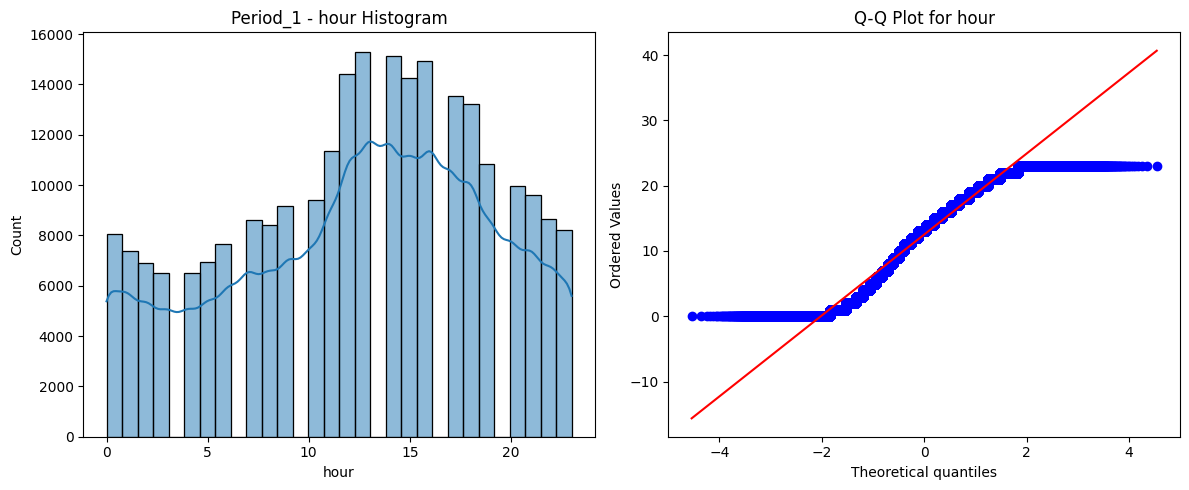

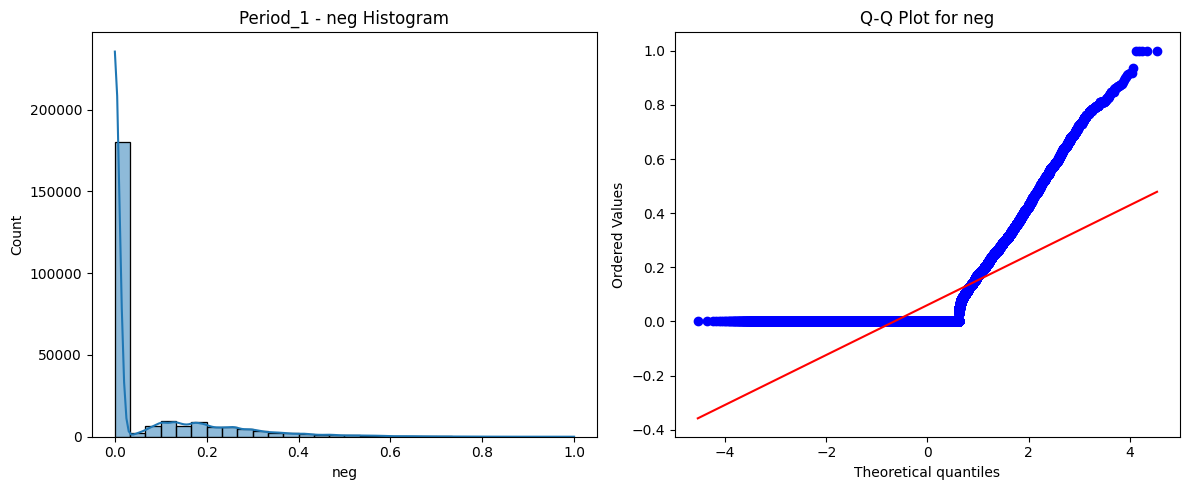

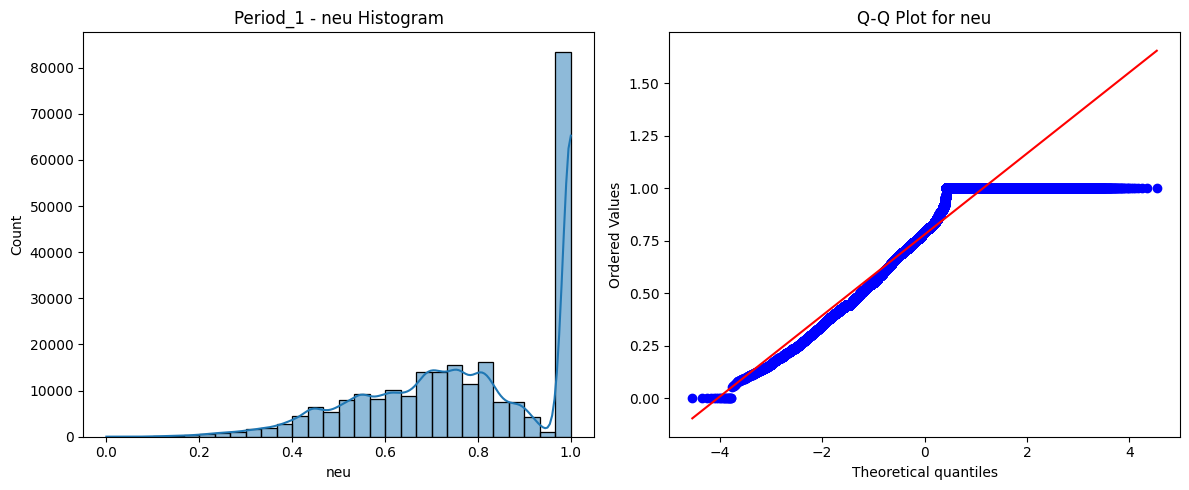

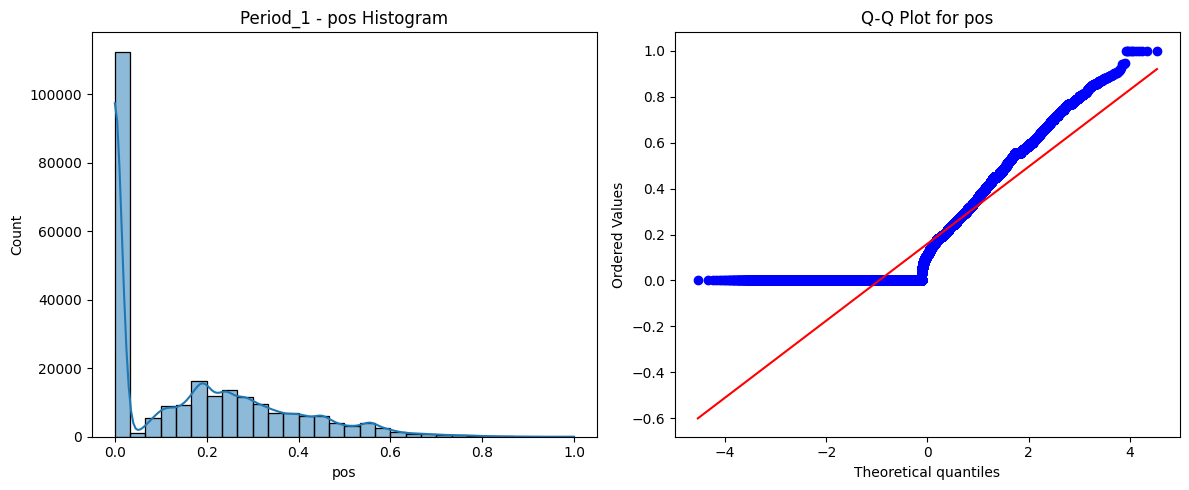

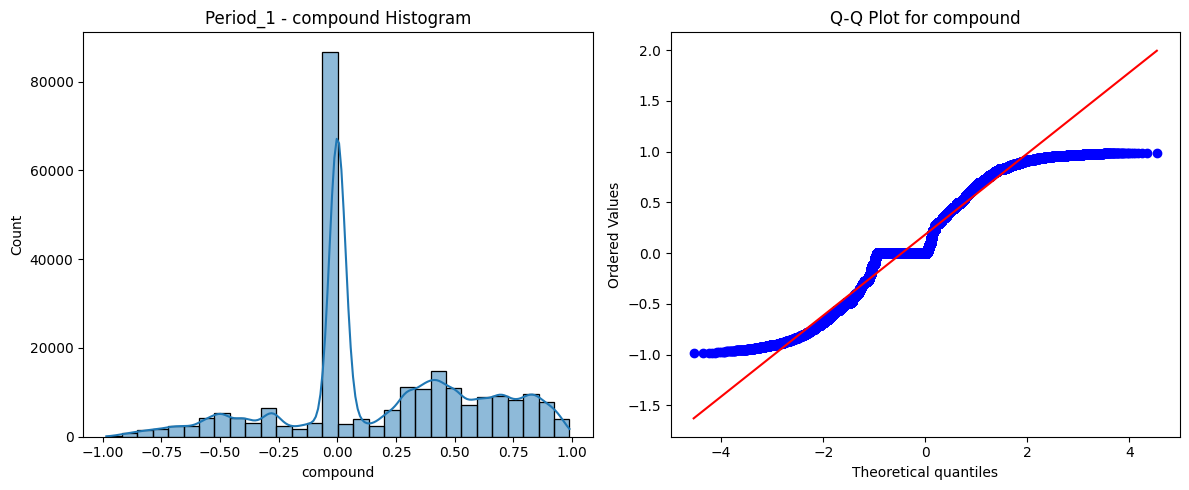

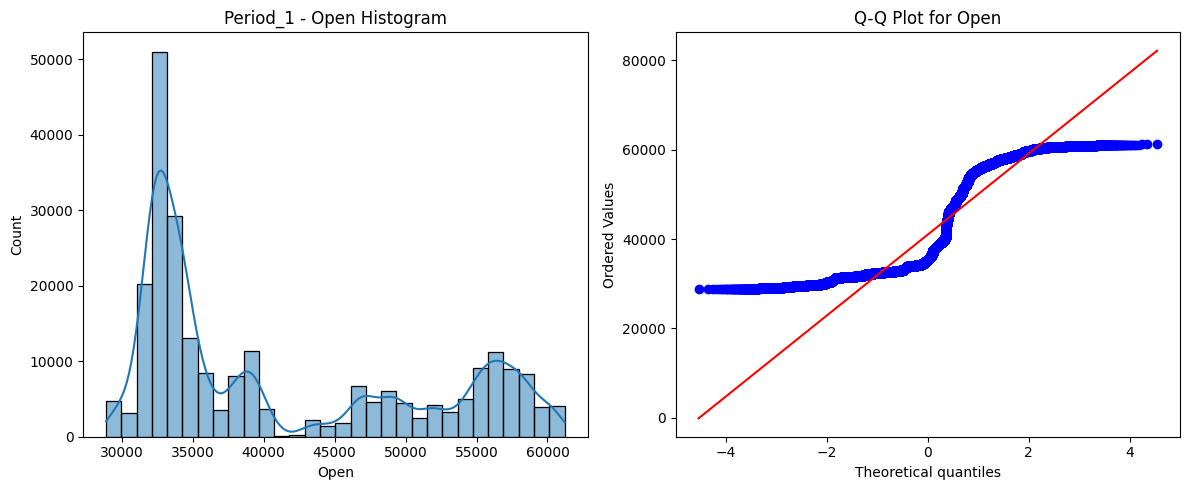

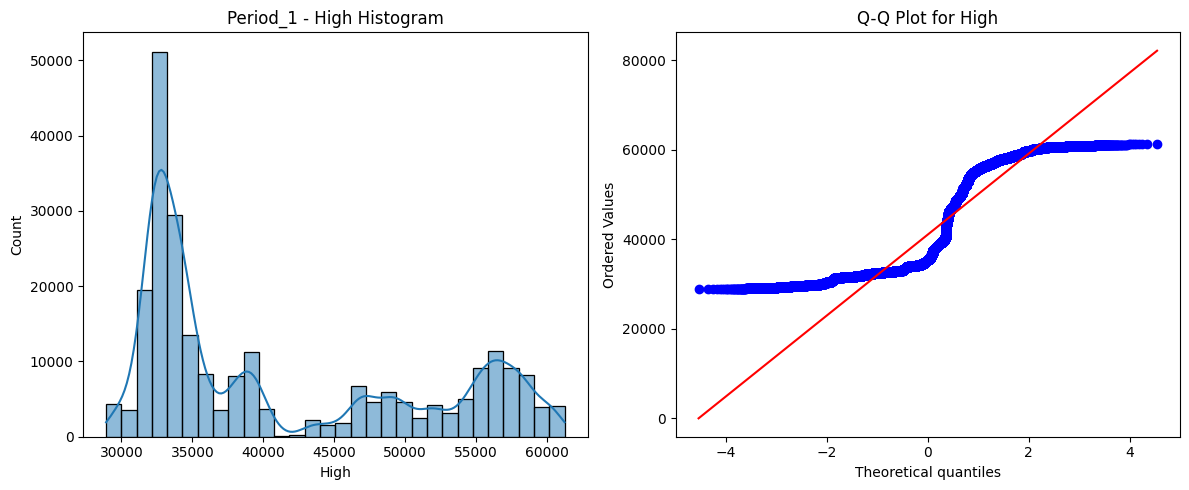

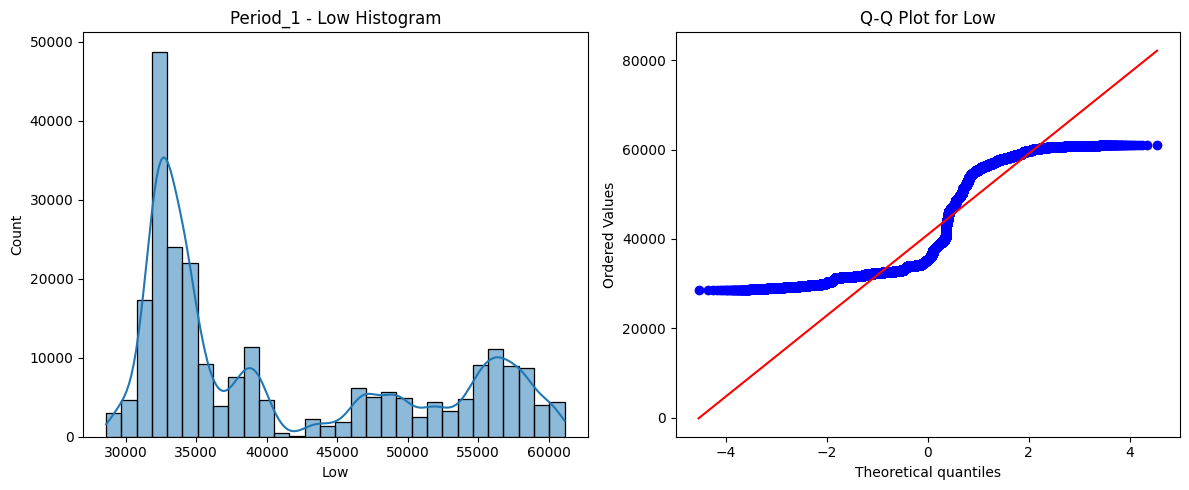

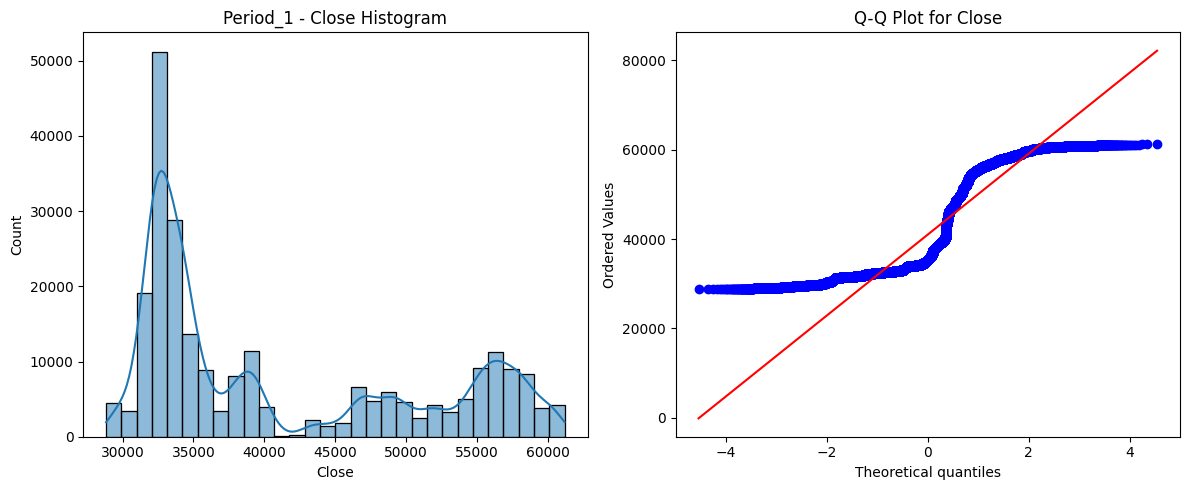

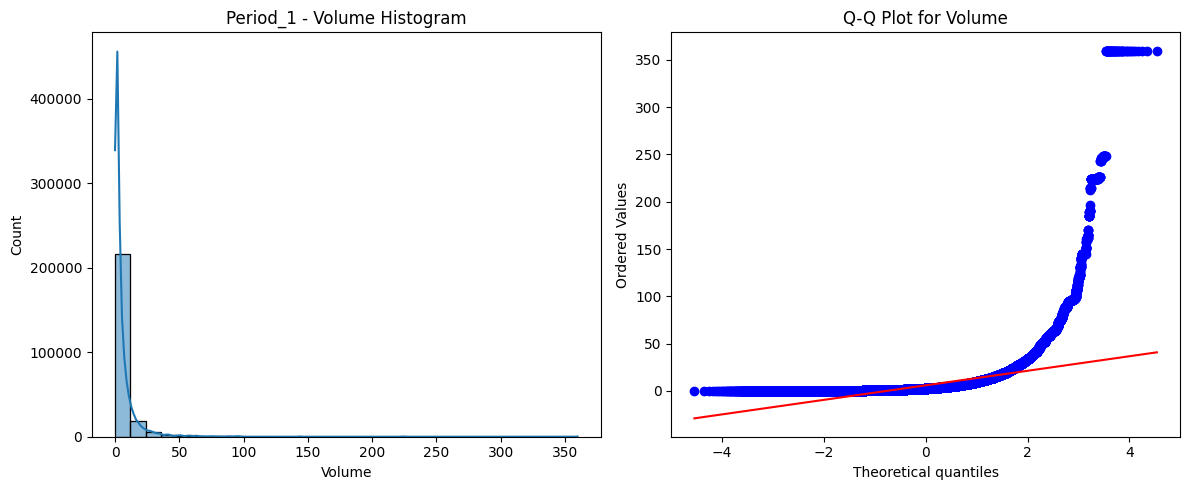

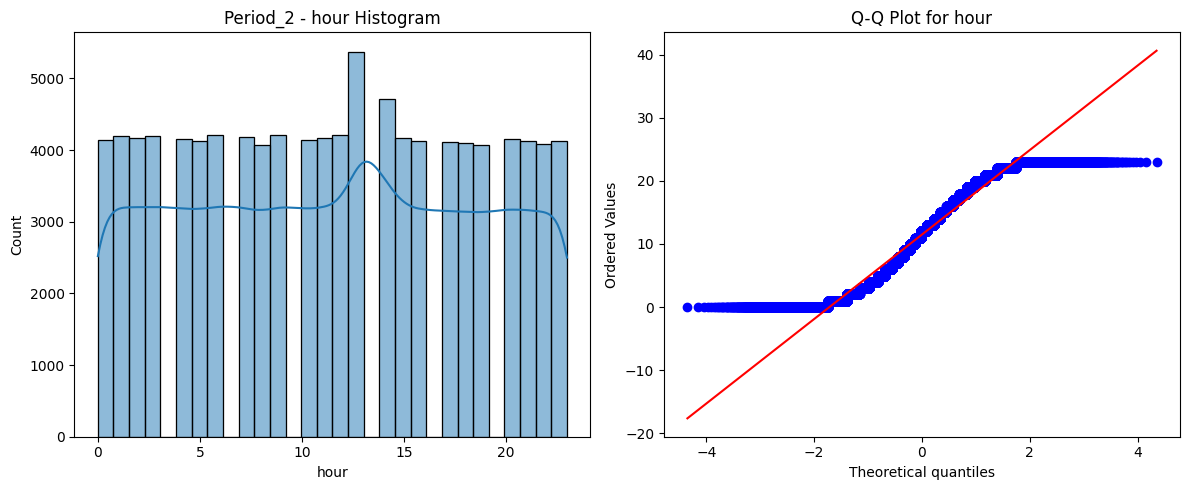

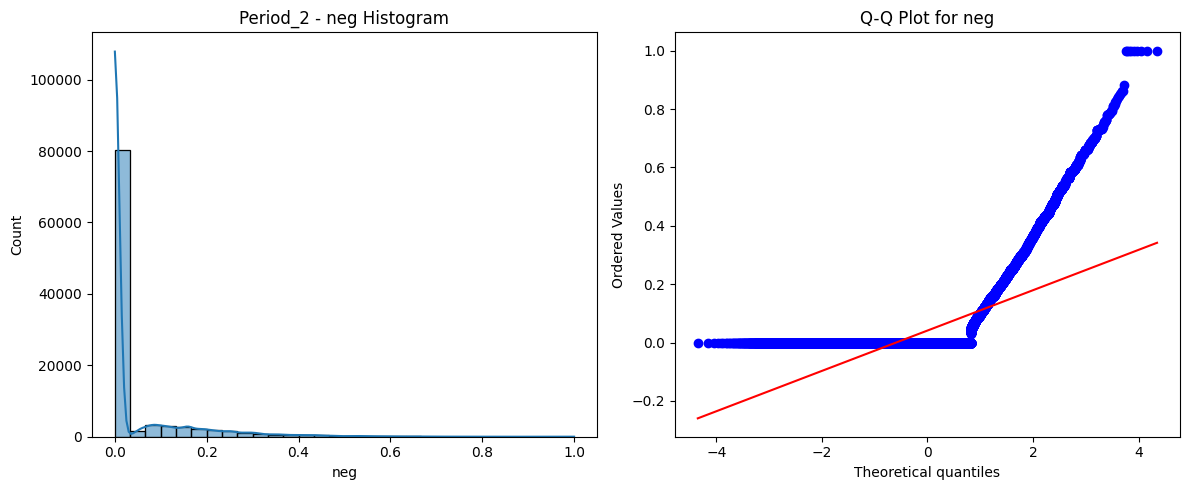

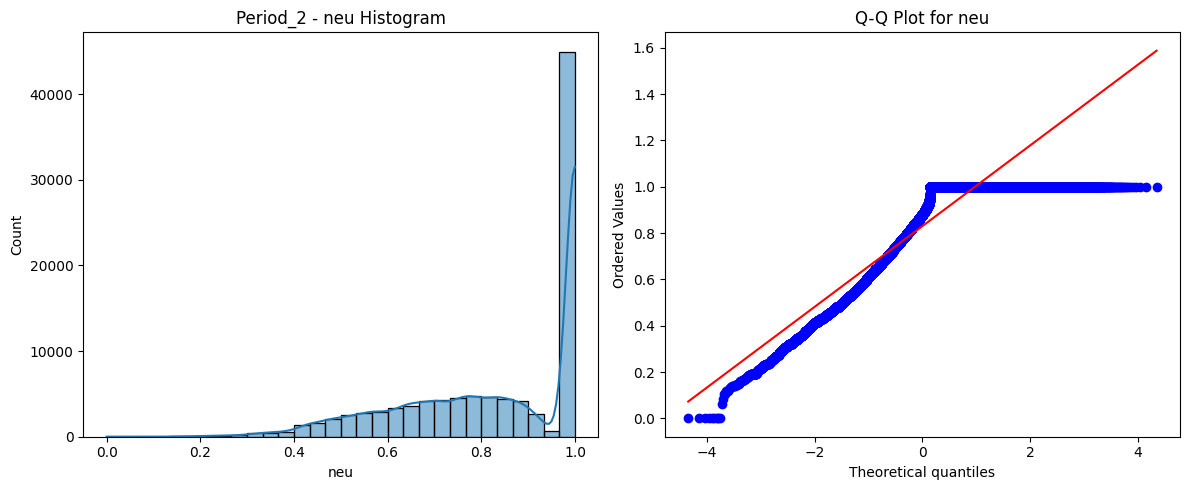

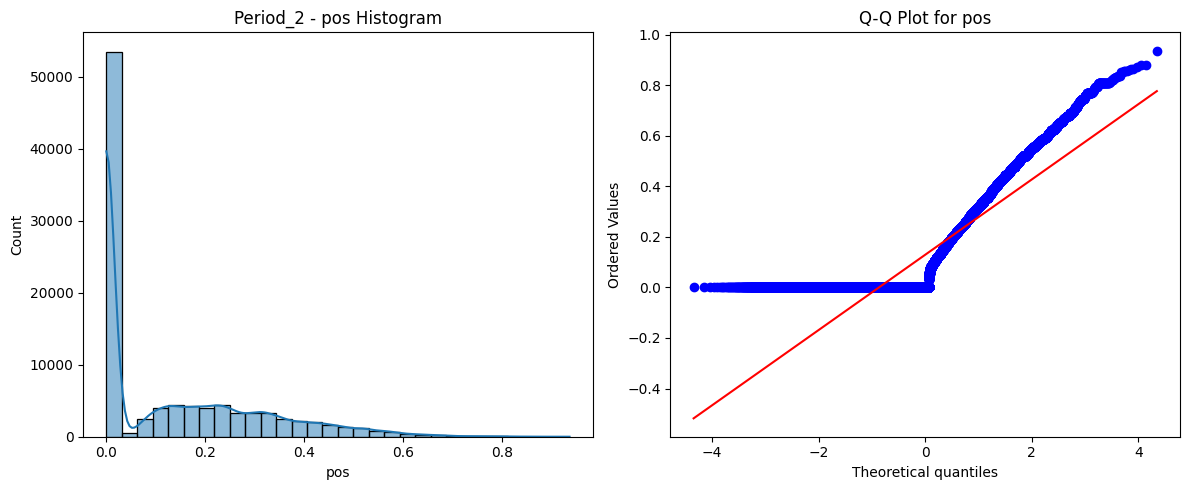

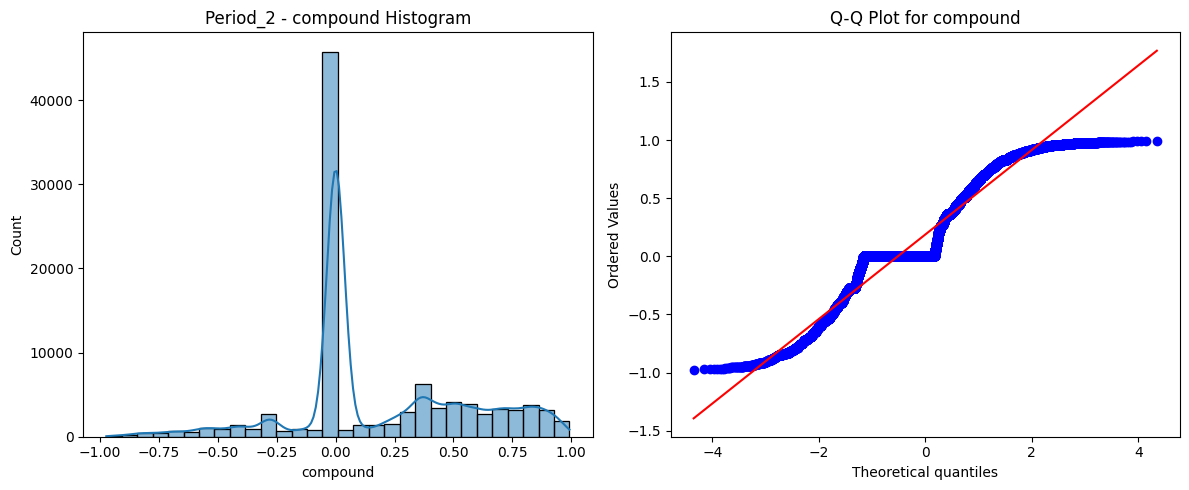

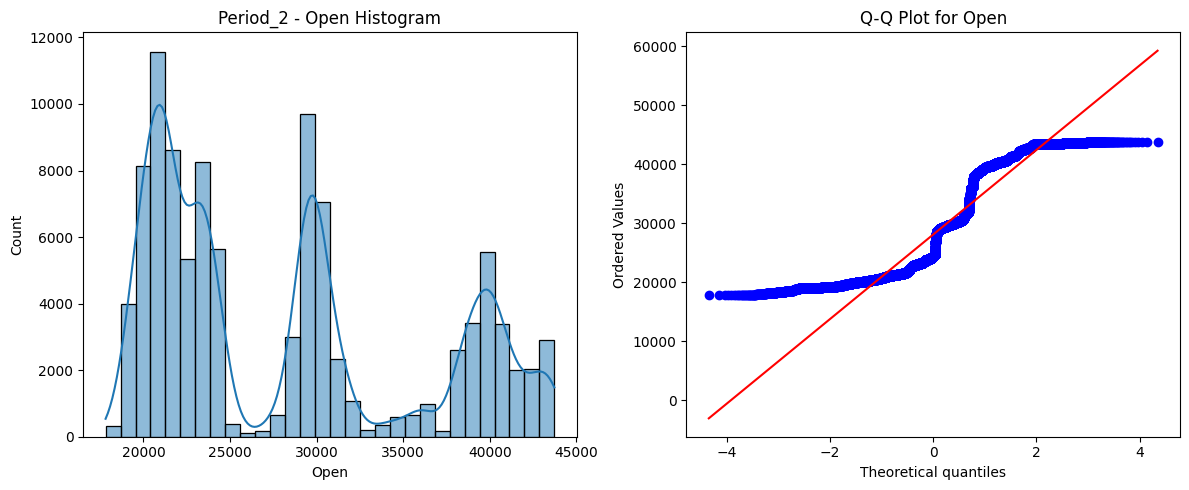

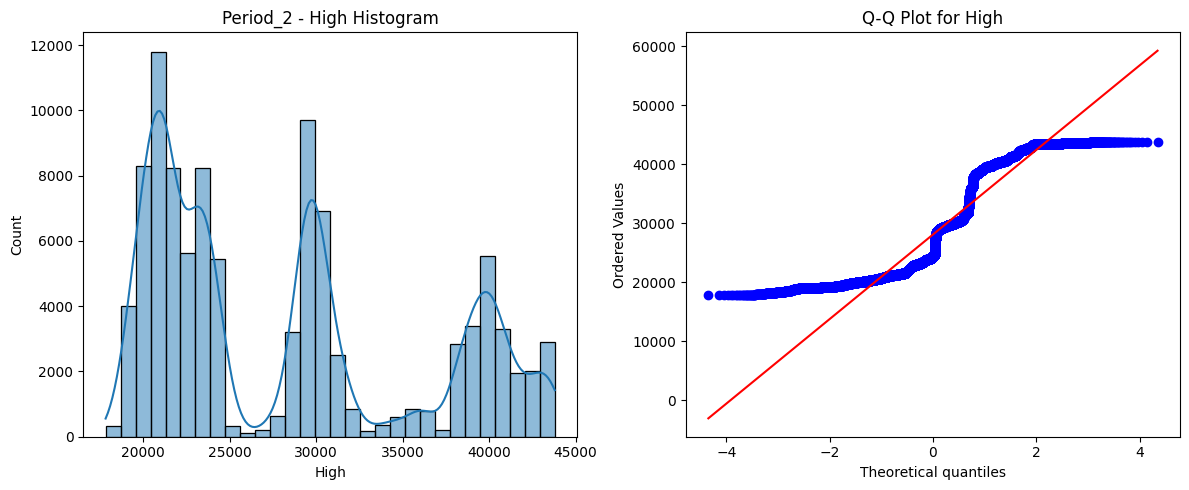

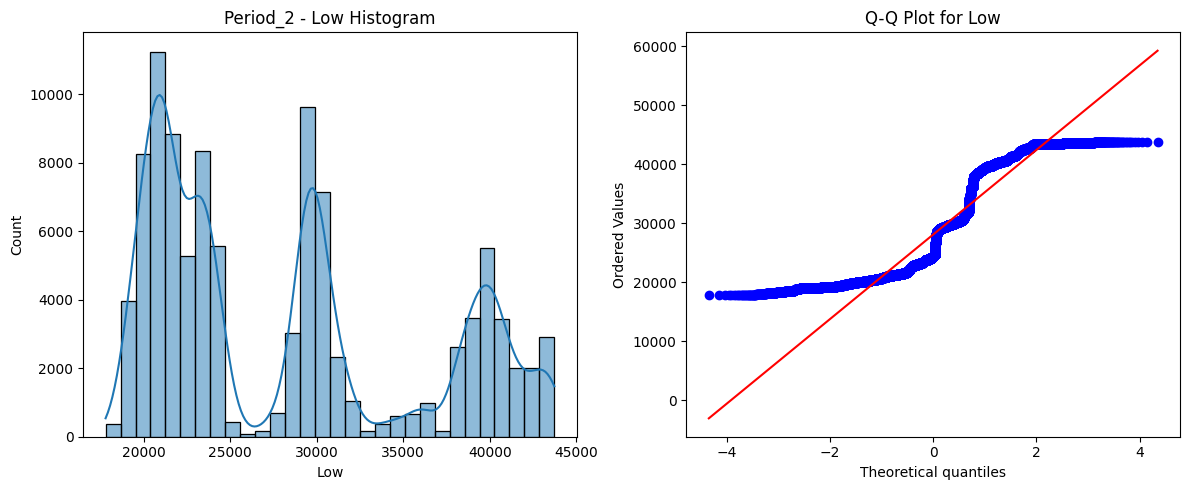

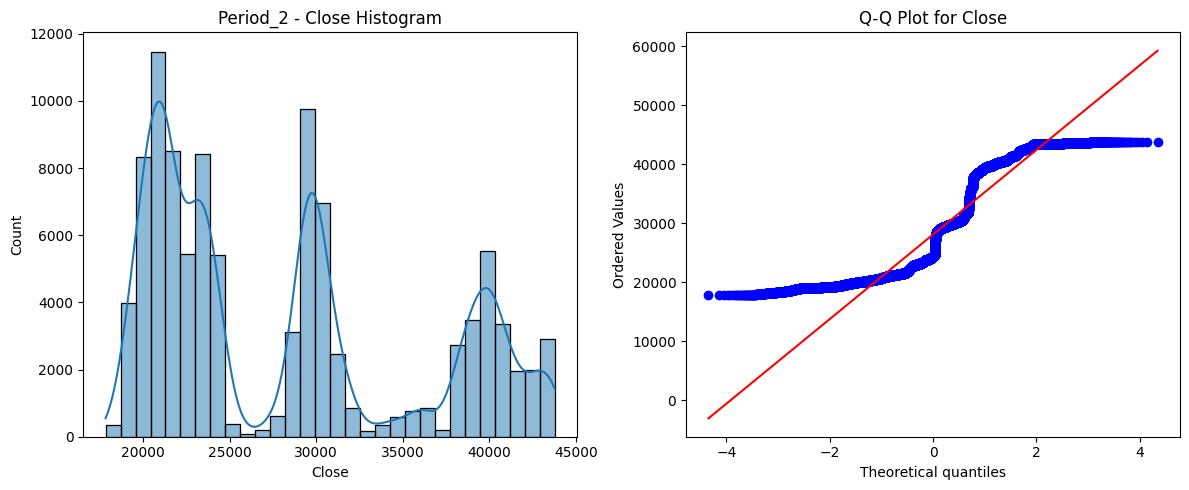

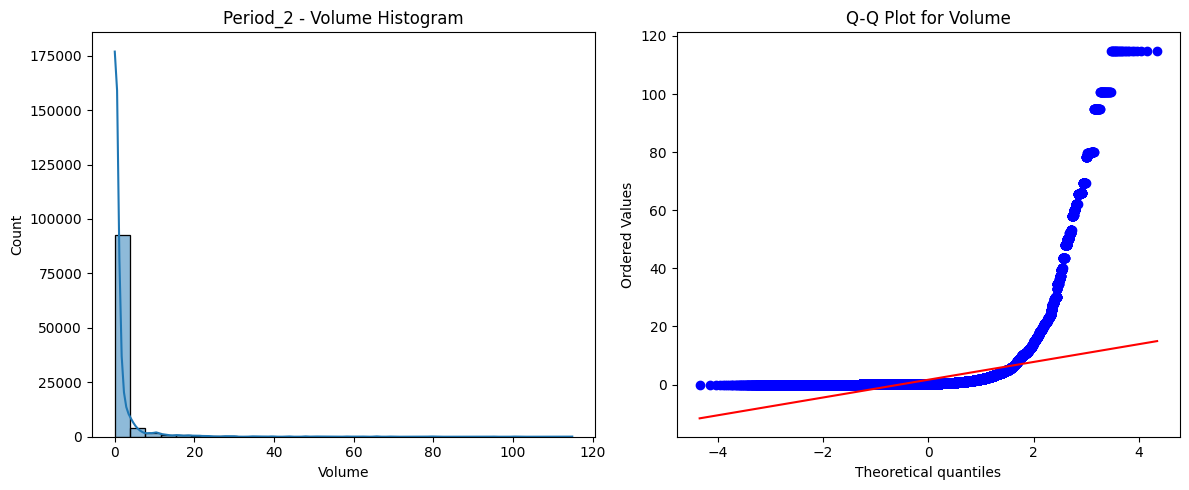

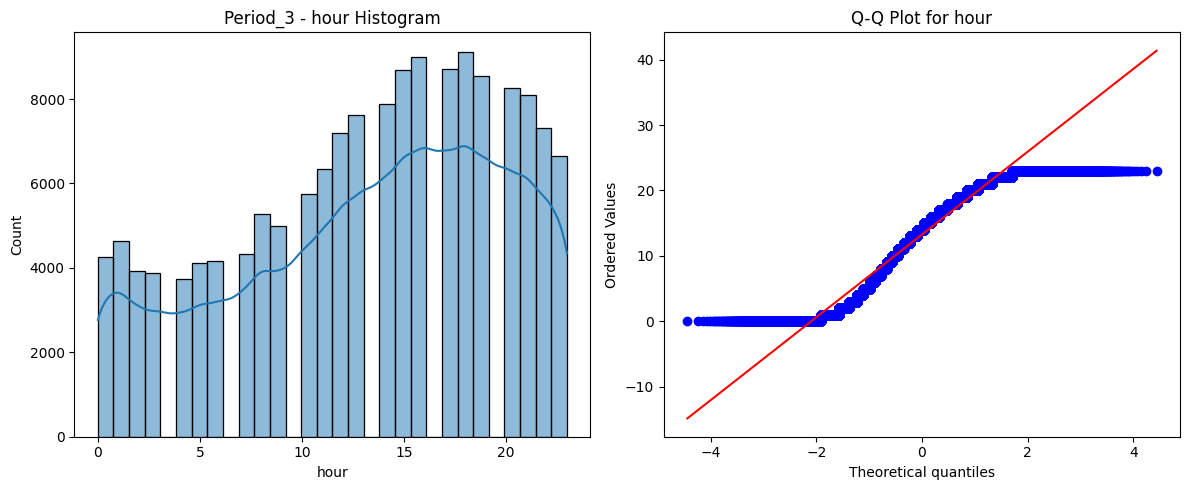

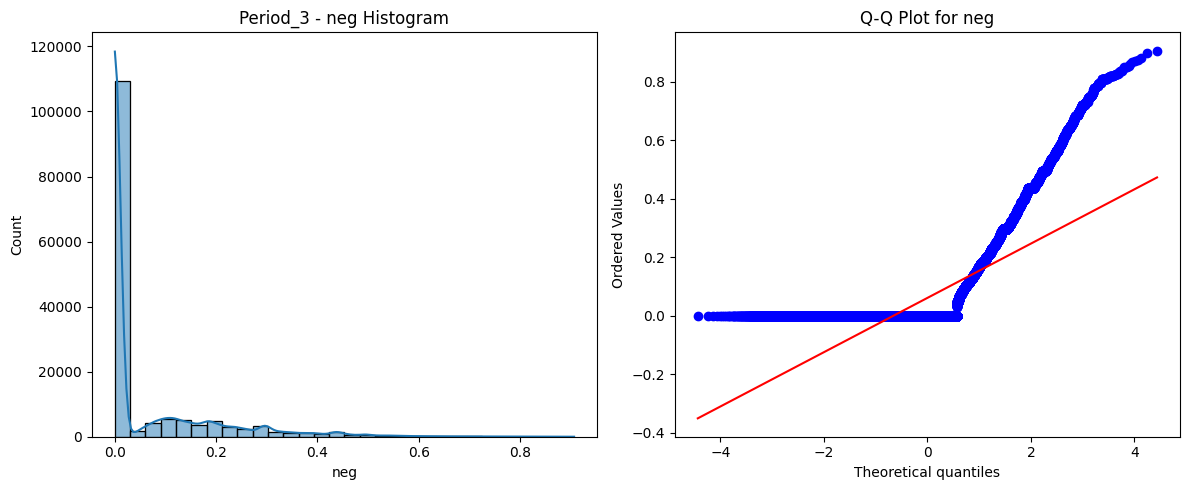

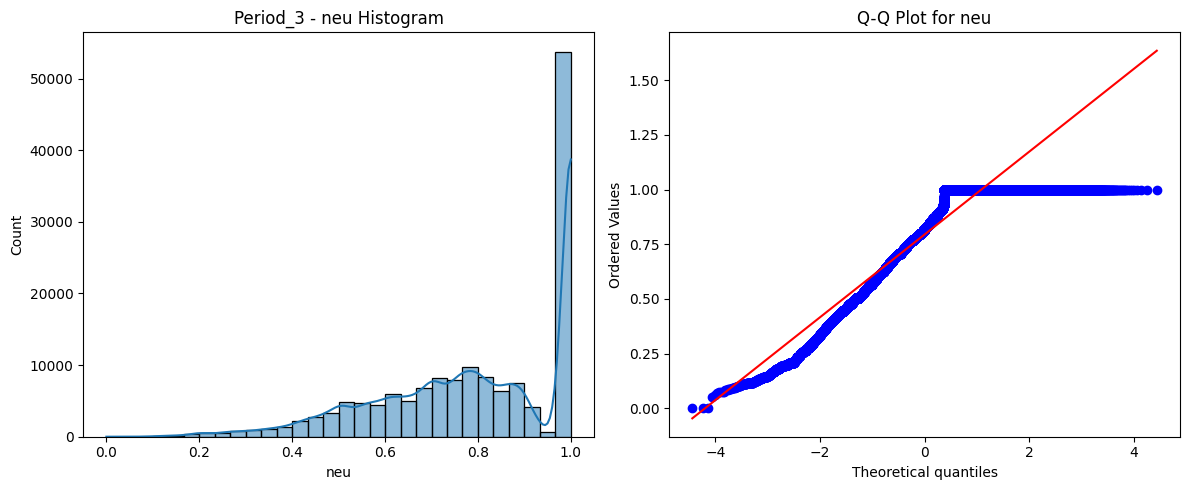

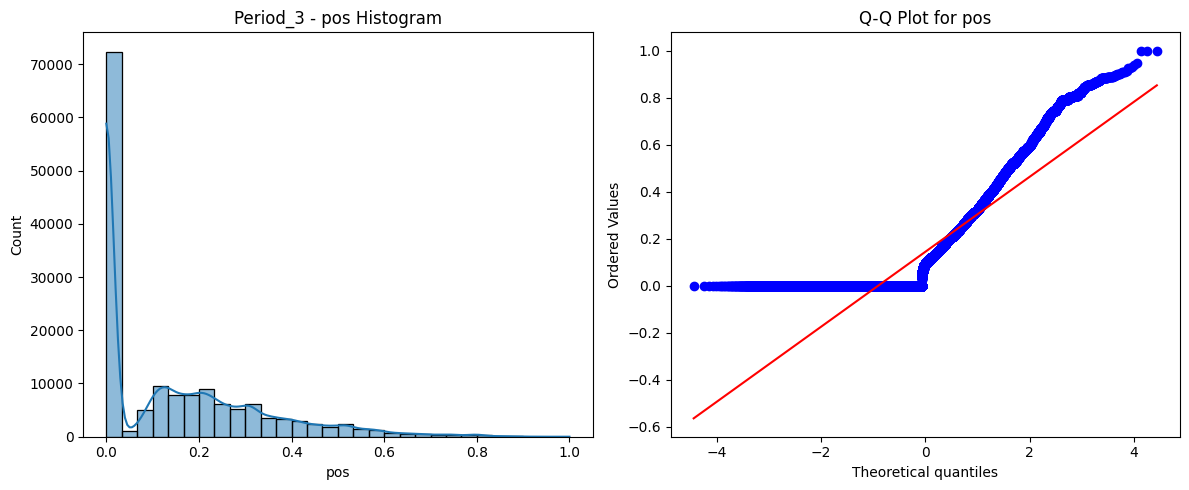

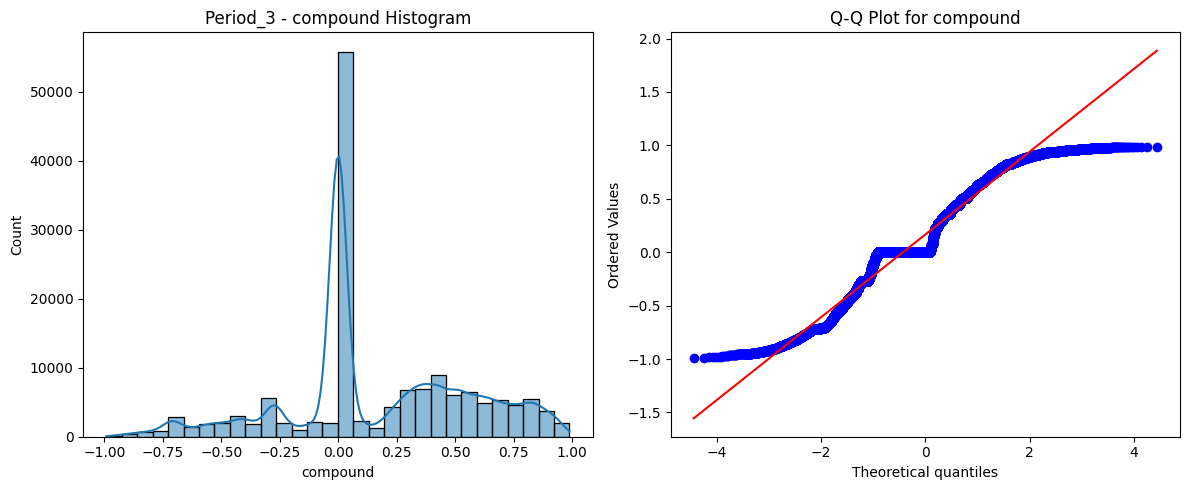

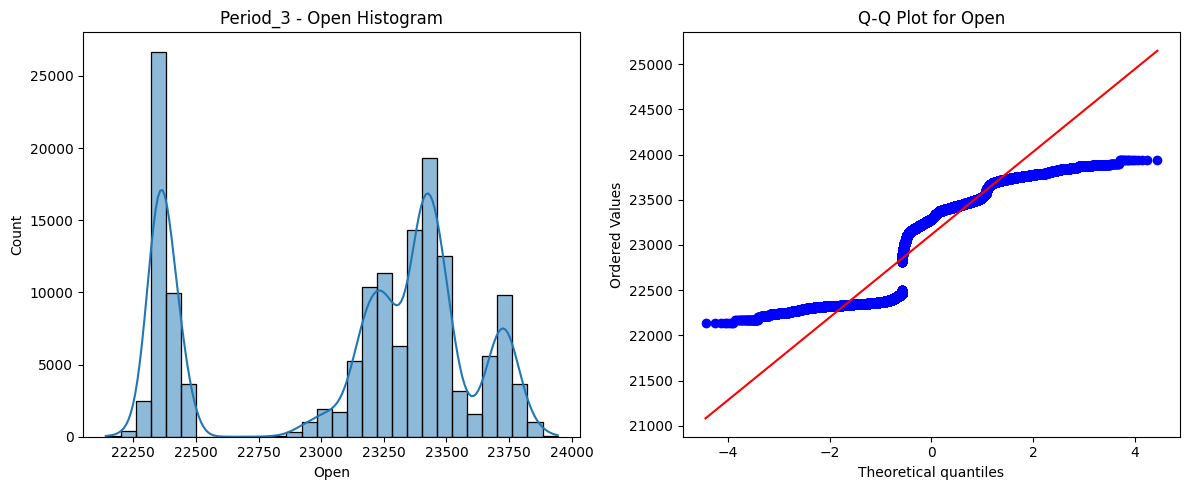

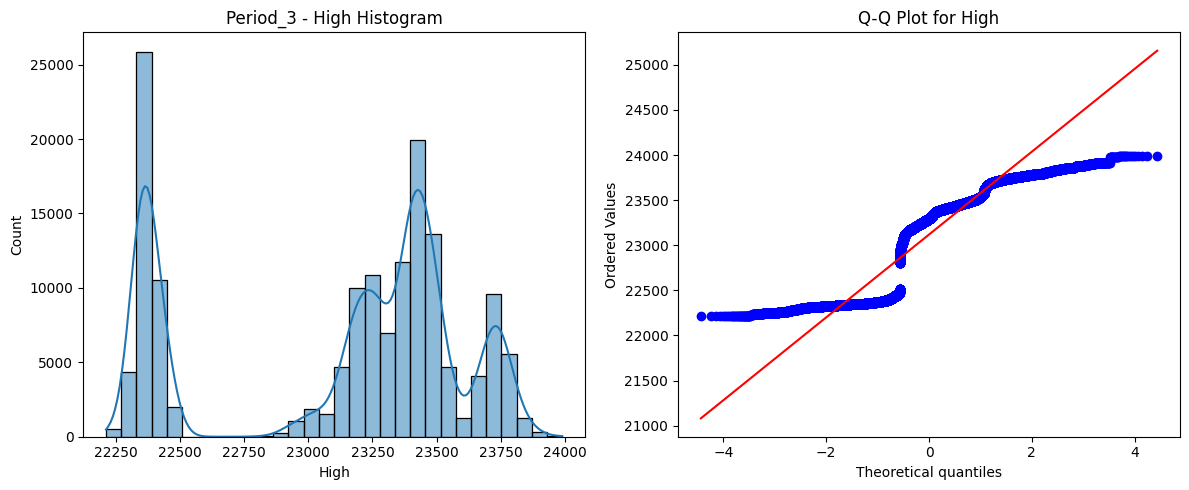

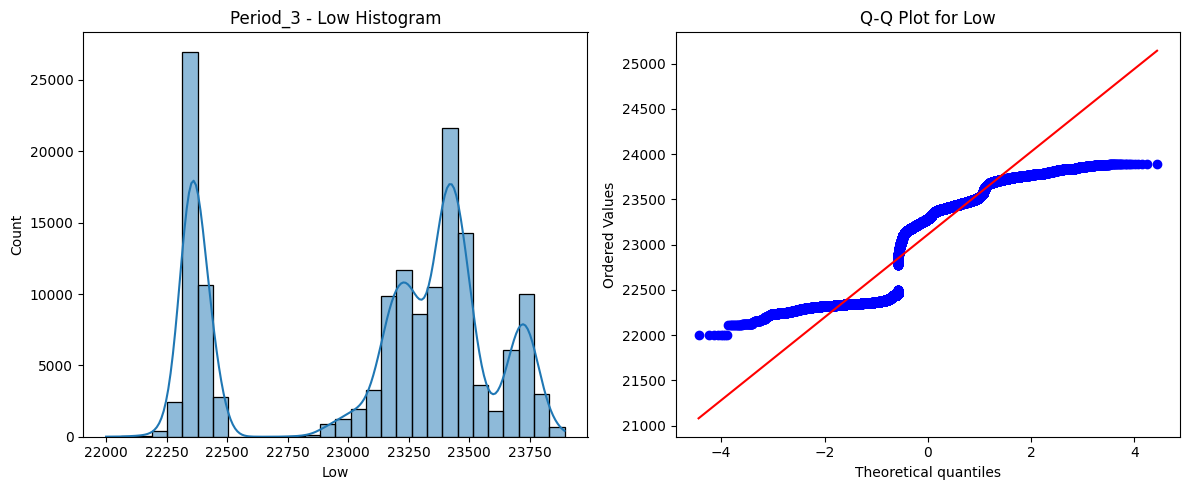

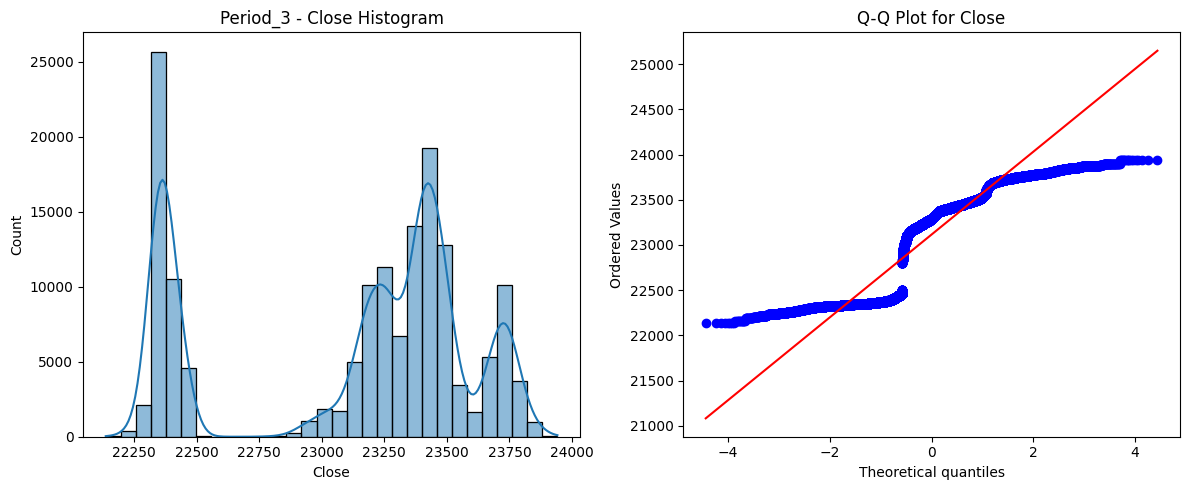

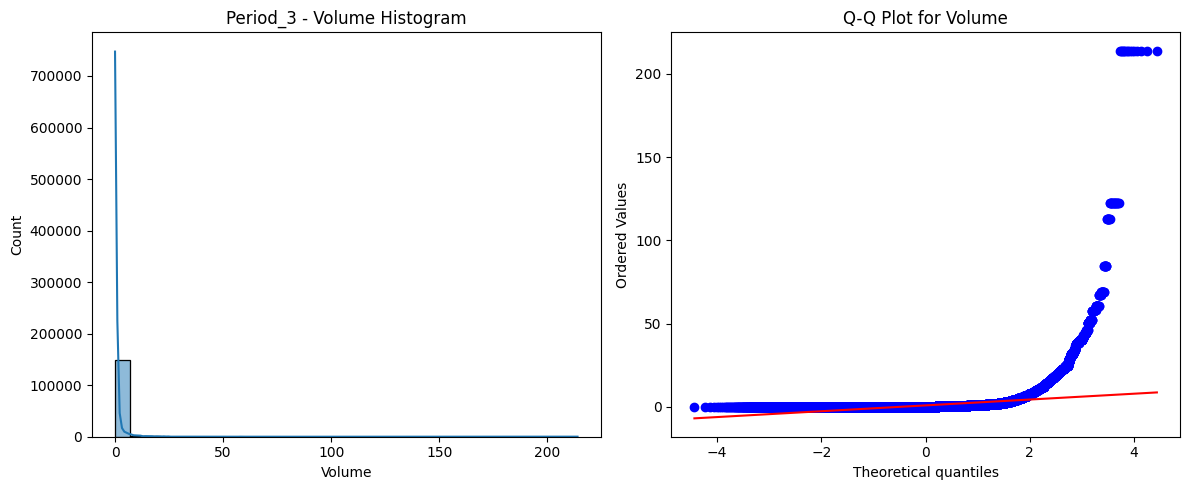

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def plot_distributions(data, period_name):
    numerical_cols = ['hour', 'neg', 'neu', 'pos', 'compound', 'Open', 'High', 'Low', 'Close', 'Volume']
    for col in numerical_cols:
        # Histogram
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f"{period_name} - {col} Histogram")

        # Q-Q Plot
        plt.subplot(1, 2, 2)
        stats.probplot(data[col].dropna(), dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for {col}")
        plt.tight_layout()
        plt.show()

for name, data in period_data.items():
    plot_distributions(data, name)

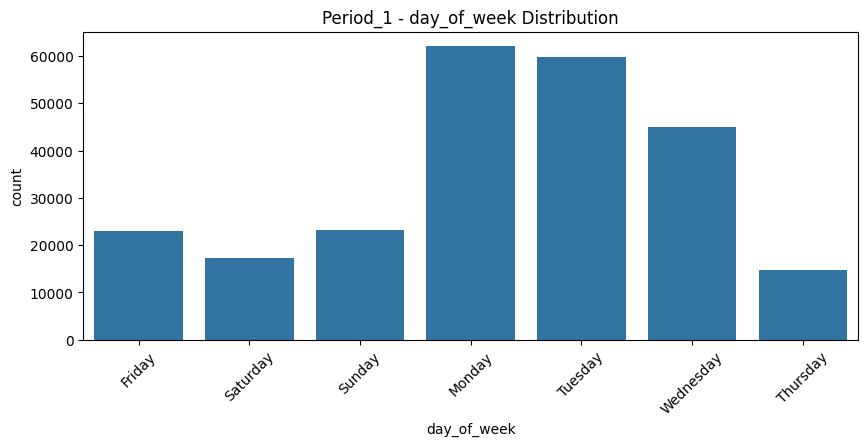

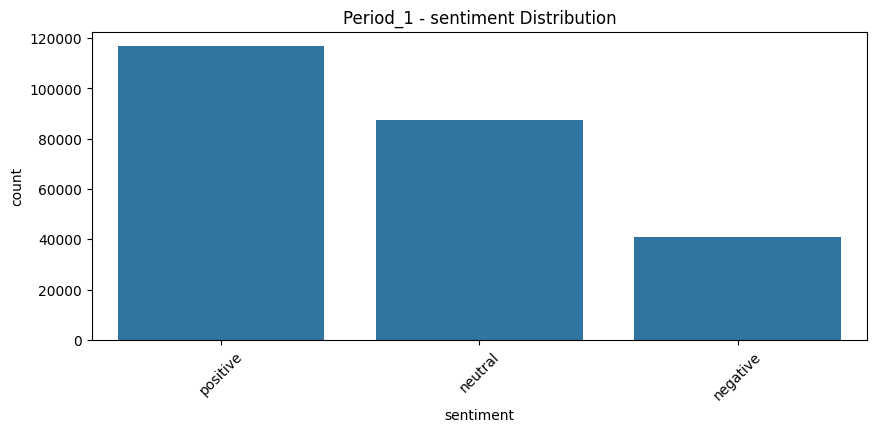

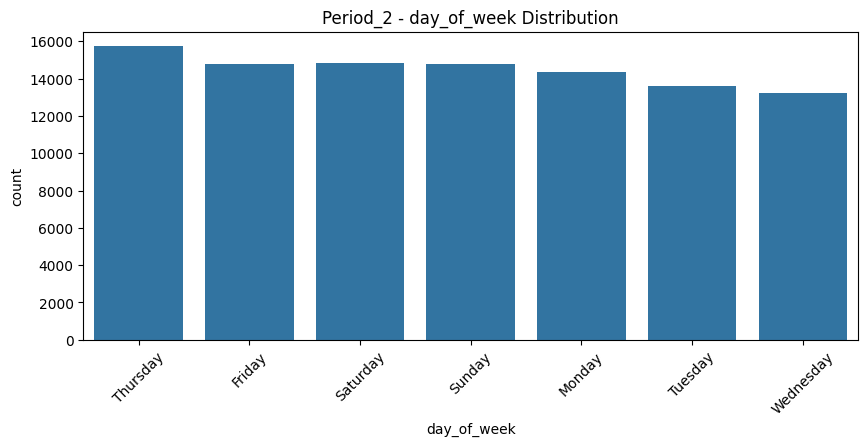

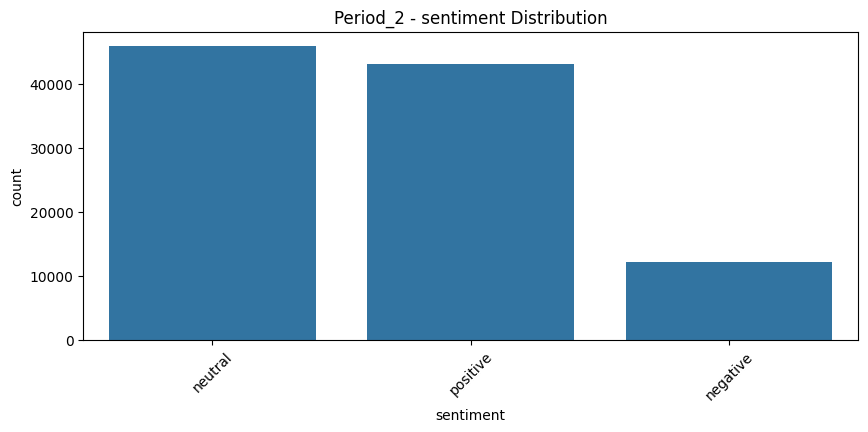

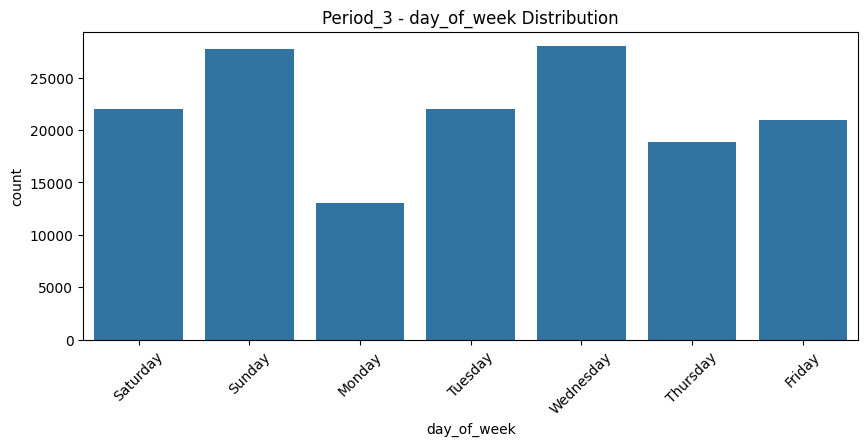

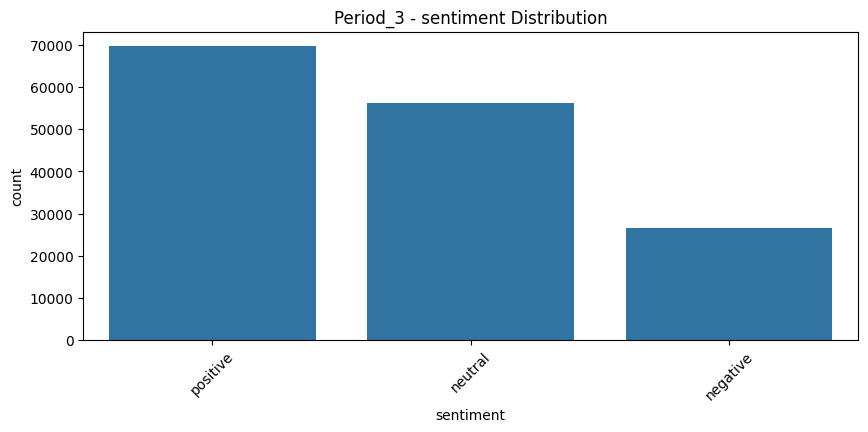

In [ ]:
def plot_categorical(data, period_name):
    categorical_cols = ['day_of_week', 'sentiment']
    for col in categorical_cols:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=col, data=data.reset_index())  # Reset index to access 'date' as a column
        plt.title(f"{period_name} - {col} Distribution")
        plt.xticks(rotation=45)
        plt.show()

for name, data in period_data.items():
    plot_categorical(data, name)

In [ ]:
from scipy.stats import shapiro

def test_normality(data, period_name):
    numerical_cols = ['hour', 'neg', 'neu', 'pos', 'compound', 'Open', 'High', 'Low', 'Close', 'Volume']
    results = []
    for col in numerical_cols:
        stat, p = shapiro(data[col].dropna())
        results.append({
            "Period": period_name,
            "Variable": col,
            "Shapiro-Wilk Statistic": stat,
            "p-value": p,
            "Normal?": "Yes" if p > 0.05 else "No"
        })
    return pd.DataFrame(results)

normality_results = pd.concat([test_normality(data, name) for name, data in period_data.items()])
print(normality_results.to_markdown())  # Display as a formatted table

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 245027.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 101295.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 152548.
  res = hypotest_fun_out(*samples, **kwds)


|    | Period   | Variable   |   Shapiro-Wilk Statistic |      p-value | Normal?   |
|---:|:---------|:-----------|-------------------------:|-------------:|:----------|
|  0 | Period_1 | hour       |                 0.962903 | 4.99729e-103 | No        |
|  1 | Period_1 | neg        |                 0.575419 | 6.71412e-178 | No        |
|  2 | Period_1 | neu        |                 0.898658 | 2.12263e-131 | No        |
|  3 | Period_1 | pos        |                 0.830775 | 3.18148e-147 | No        |
|  4 | Period_1 | compound   |                 0.950553 | 8.78299e-111 | No        |
|  5 | Period_1 | Open       |                 0.823516 | 1.46504e-148 | No        |
|  6 | Period_1 | High       |                 0.822814 | 1.0944e-148  | No        |
|  7 | Period_1 | Low        |                 0.824282 | 2.01657e-148 | No        |
|  8 | Period_1 | Close      |                 0.823506 | 1.45897e-148 | No        |
|  9 | Period_1 | Volume     |                 0.397298 | 2.35906

As Normality is not matched so I will use non linera Models


Scenario	Recommended Model
Predicting Close price	XGBoost (with lag features)
Time-series forecasting	LSTM or Prophet
Explainability needed	Random Forest + SHAP


In [ ]:
continuous_cols = ['neg', 'neu', 'pos', 'compound', 'Open', 'High', 'Low', 'Close', 'Volume']
data = combined_Data[continuous_cols]

In [ ]:
import pandas as pd

# Assuming period_data is already defined from earlier
spearman_results = {}
for period_name, data in period_data.items():
    # Select numerical columns only (exclude categorical/text)
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    spearman_results[period_name] = numerical_data.corr(method='spearman')

In [ ]:
import pandas as pd

spearman_results = {}
for period_name, data in period_data.items():
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    spearman_results[period_name] = numerical_data.corr(method='spearman').round(2)

In [ ]:
for period, corr in spearman_results.items():
    price_corr = corr.loc[['Open', 'High', 'Low'], 'Close'].to_frame(name='Corr_with_Close')
    print(f"\n{period} - Price Correlations:\n", price_corr)


Period_1 - Price Correlations:
       Corr_with_Close
Open              1.0
High              1.0
Low               1.0

Period_2 - Price Correlations:
       Corr_with_Close
Open              1.0
High              1.0
Low               1.0

Period_3 - Price Correlations:
       Corr_with_Close
Open              1.0
High              1.0
Low               1.0


In [ ]:
for period, corr in spearman_results.items():
    sentiment_corr = corr.loc[['compound', 'pos', 'neg'], 'Close'].to_frame(name='Corr_with_Close')
    print(f"\n{period} - Sentiment Correlations:\n", sentiment_corr)


Period_1 - Sentiment Correlations:
           Corr_with_Close
compound            -0.04
pos                 -0.08
neg                 -0.09

Period_2 - Sentiment Correlations:
           Corr_with_Close
compound             0.04
pos                  0.03
neg                 -0.02

Period_3 - Sentiment Correlations:
           Corr_with_Close
compound             0.01
pos                  0.00
neg                 -0.02


In [ ]:
for period, corr in spearman_results.items():
    volume_corr = corr.loc[['Volume'], ['Close', 'compound']]
    print(f"\n{period} - Volume Correlations:\n", volume_corr)


Period_1 - Volume Correlations:
         Close  compound
Volume  -0.18     -0.01

Period_2 - Volume Correlations:
         Close  compound
Volume  -0.07     -0.02

Period_3 - Volume Correlations:
         Close  compound
Volume   0.06     -0.01


In [ ]:
combined_Data.shape

(498870, 13)

In [ ]:
# Get DataFrame info
print(combined_Data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 498870 entries, 2021-02-05 10:52:04 to 2023-03-05 23:59:56
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cleaned_text  498870 non-null  object 
 1   hour          498870 non-null  int64  
 2   day_of_week   498870 non-null  object 
 3   neg           498870 non-null  float64
 4   neu           498870 non-null  float64
 5   pos           498870 non-null  float64
 6   compound      498870 non-null  float64
 7   sentiment     498870 non-null  object 
 8   Open          498870 non-null  float64
 9   High          498870 non-null  float64
 10  Low           498870 non-null  float64
 11  Close         498870 non-null  float64
 12  Volume        498870 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 69.4+ MB
None


In [ ]:
# Define time periods
time_periods = {
    "Period_1": ("2021-02-05 10:52:04", "2021-06-23 19:29:37"),
    "Period_2": ("2022-04-07 13:00:00", "2022-08-30 12:31:00"),
    "Period_3": ("2023-02-25 20:49:09", "2023-03-05 23:59:56")
}

XGBoost Models

In [ ]:
period_data = {}
for name, (start, end) in time_periods.items():
    period_data[name] = combined_Data.loc[start:end].copy()

In [ ]:
def add_features(df):
    # Lag features
    for lag in [1, 3, 7]:
        df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    # Rolling statistics
    df['Close_rolling_mean_7'] = df['Close'].rolling(window=7).mean()
    df['Close_rolling_std_7'] = df['Close'].rolling(window=7).std()
    return df.dropna()

for name in period_data:
    period_data[name] = add_features(period_data[name])

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = {}
results = []

for name, data in period_data.items():
    # Features and target
    features = ['neg', 'neu', 'pos', 'compound', 'hour',
                'Close_lag_1', 'Close_lag_3', 'Close_lag_7',
                'Close_rolling_mean_7', 'Close_rolling_std_7']
    X = data[features]
    y = data['Close']

    # Train-test split (time-based)
    split_idx = int(0.8 * len(X))
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Train model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
    model.fit(X_train, y_train)
    models[name] = model

    # Evaluate
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = model.score(X_test, y_test)

    results.append({
        'Period': name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.to_markdown())

|    | Period   |      MAE |     RMSE |        R² |
|---:|:---------|---------:|---------:|----------:|
|  0 | Period_1 | 257.224  | 606.102  |  0.841106 |
|  1 | Period_2 |  44.2265 |  67.3533 |  0.997671 |
|  2 | Period_3 |  26.898  |  70.0438 | -1.40993  |


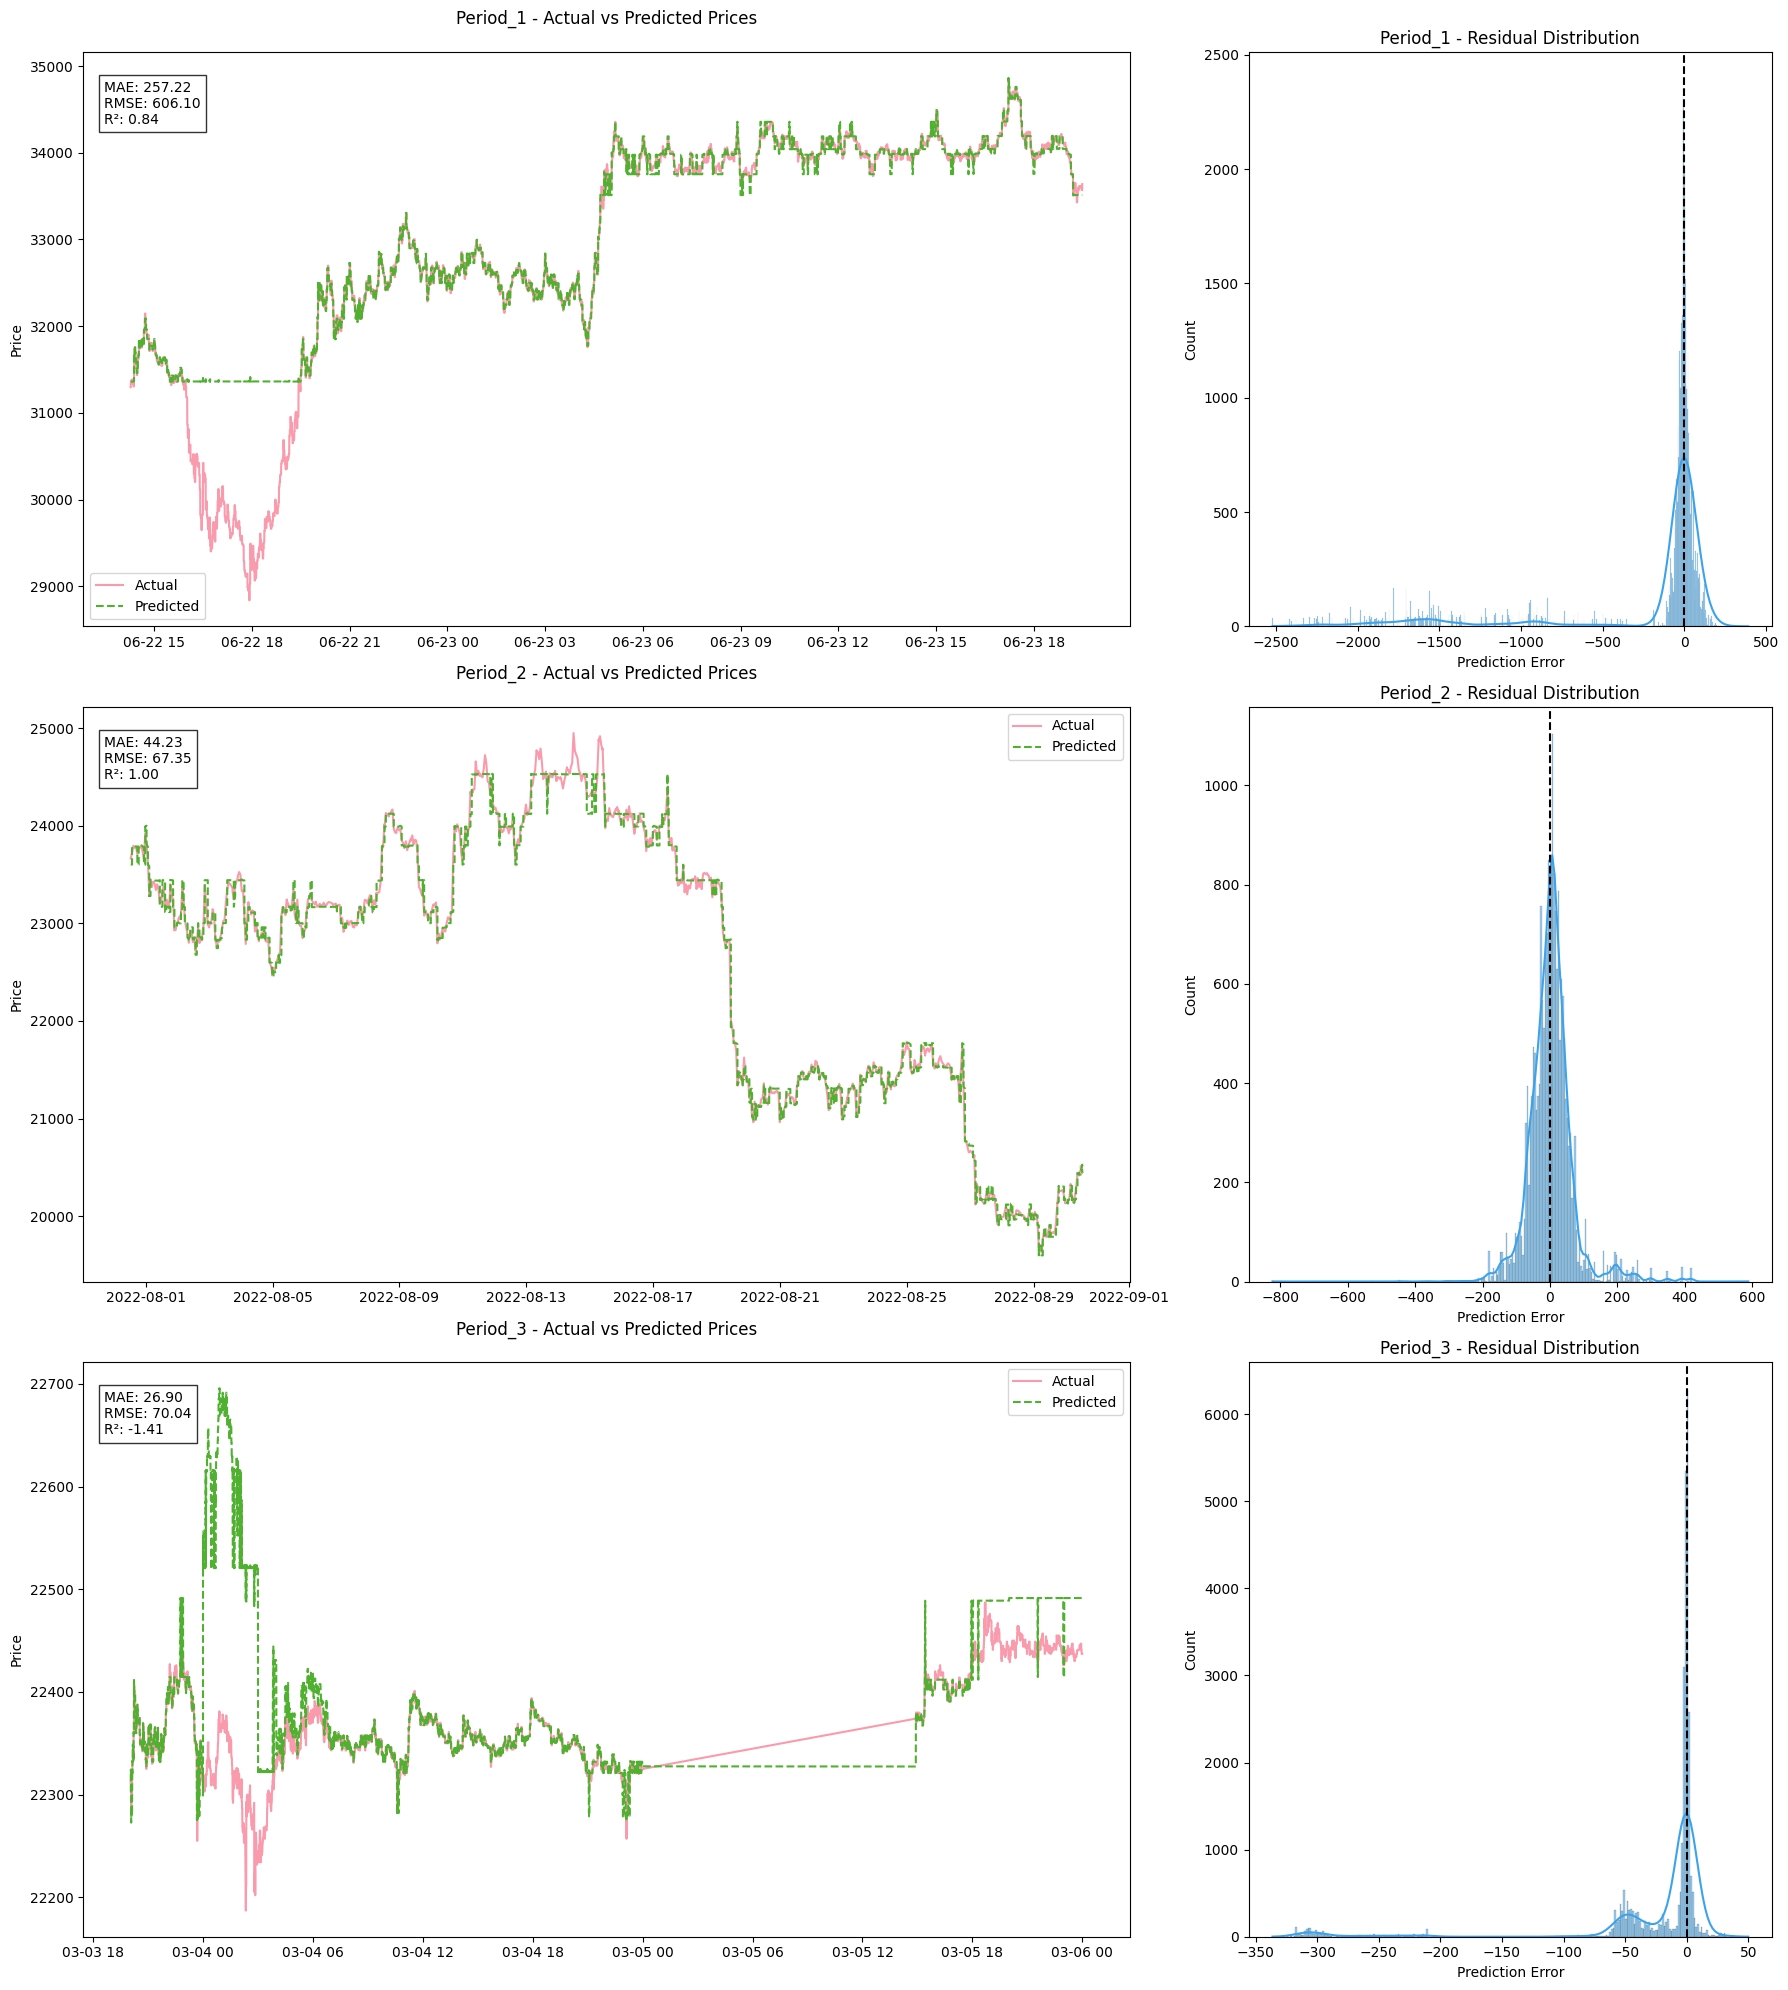

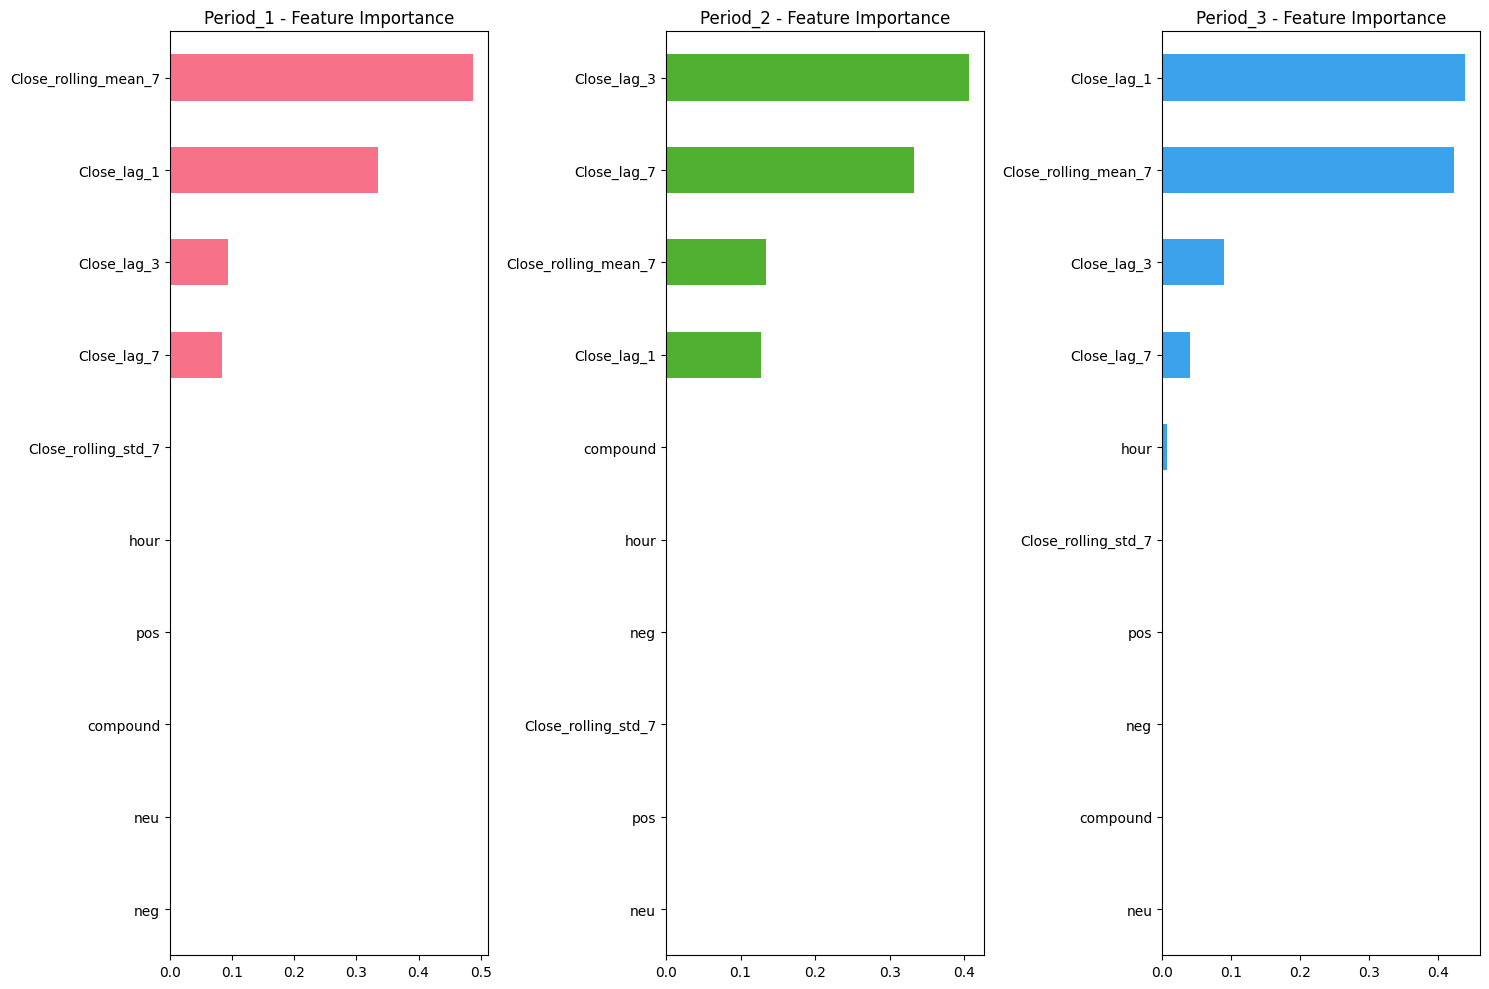

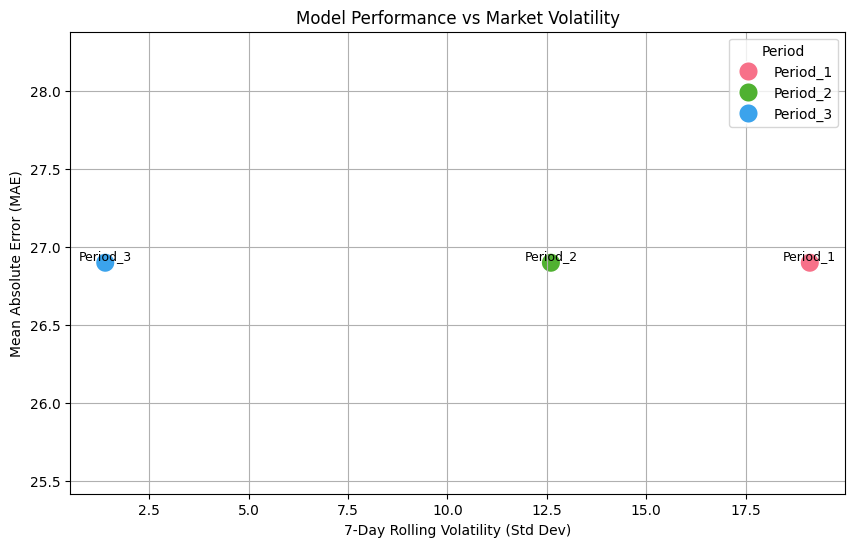

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set up the figure structure
plt.figure(figsize=(18, 20))
gs = GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[2, 1])

# Create subplots
ax1 = plt.subplot(gs[0, 0])  # Period 1 time series
ax2 = plt.subplot(gs[0, 1])  # Period 1 residuals
ax3 = plt.subplot(gs[1, 0])  # Period 2 time series
ax4 = plt.subplot(gs[1, 1])  # Period 2 residuals
ax5 = plt.subplot(gs[2, 0])  # Period 3 time series
ax6 = plt.subplot(gs[2, 1])  # Period 3 residuals

# Colors
palette = sns.color_palette("husl", 3)

for i, (name, data) in enumerate(period_data.items()):
    # Get model and split data
    model = models[name]
    features = ['neg', 'neu', 'pos', 'compound', 'hour',
                'Close_lag_1', 'Close_lag_3', 'Close_lag_7',
                'Close_rolling_mean_7', 'Close_rolling_std_7']
    X = data[features]
    y = data['Close']
    split_idx = int(0.8 * len(X))
    X_test = X.iloc[split_idx:]
    y_test = y.iloc[split_idx:]

    # Predictions
    y_pred = model.predict(X_test)
    dates = data.iloc[split_idx:].index

    # Select axis pair
    ts_ax = [ax1, ax3, ax5][i]
    res_ax = [ax2, ax4, ax6][i]

    # Time series plot
    ts_ax.plot(dates, y_test, label='Actual', color=palette[0], alpha=0.7)
    ts_ax.plot(dates, y_pred, label='Predicted', color=palette[1], linestyle='--')
    ts_ax.set_title(f'{name} - Actual vs Predicted Prices', pad=20)
    ts_ax.set_ylabel('Price')
    ts_ax.legend()

    # Residual plot
    residuals = y_test - y_pred
    sns.histplot(residuals, ax=res_ax, kde=True, color=palette[2])
    res_ax.axvline(0, color='black', linestyle='--')
    res_ax.set_title(f'{name} - Residual Distribution')
    res_ax.set_xlabel('Prediction Error')

    # Add metrics to plot
    metrics_text = (f"MAE: {results_df.loc[i,'MAE']:.2f}\n"
                   f"RMSE: {results_df.loc[i,'RMSE']:.2f}\n"
                   f"R²: {results_df.loc[i,'R²']:.2f}")
    ts_ax.text(0.02, 0.95, metrics_text, transform=ts_ax.transAxes,
              verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Feature importance visualization
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    feat_imp = pd.Series(model.feature_importances_, index=features)
    feat_imp.sort_values().plot(kind='barh', color=palette[i-1])
    plt.title(f'{name} - Feature Importance')
plt.tight_layout()
plt.show()

# Volatility comparison plot
volatility = []
for name, data in period_data.items():
    vol = data['Close_rolling_std_7'].mean()
    volatility.append({'Period': name, 'Volatility': vol, 'MAE': results_df.loc[i-1,'MAE']})

vol_df = pd.DataFrame(volatility)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=vol_df, x='Volatility', y='MAE', hue='Period',
                palette=palette, s=200)
plt.title('Model Performance vs Market Volatility')
plt.xlabel('7-Day Rolling Volatility (Std Dev)')
plt.ylabel('Mean Absolute Error (MAE)')
for i, row in vol_df.iterrows():
    plt.text(row['Volatility'], row['MAE'], row['Period'],
             ha='center', va='bottom', fontsize=9)
plt.grid(True)
plt.show()

2nd

In [ ]:
# Load the dataset, specifying the error_bad_lines parameter to skip problematic lines
combined_Data_1 = pd.read_csv('combined_data.csv')
print(combined_Data.head())

                                                          cleaned_text  hour  \
date                                                                           
2021-02-05 10:52:04  Weekend Read Keen learn crypto asset check rea...    10   
2021-02-05 10:53:49  bitcoin eth bullish setup high BTC great daily...    10   
2021-02-05 10:54:52             perl insist increase month bitcoin btc    10   
2021-02-05 10:57:05  amazing monopoly Crypto cryptocurrency cryptoc...    10   
2021-02-05 10:58:03  juld bnb Binance bsc binancesmartchain BTC bit...    10   

                    day_of_week  neg    neu    pos  compound sentiment  \
date                                                                     
2021-02-05 10:52:04      Friday  0.0  0.643  0.357    0.6124  positive   
2021-02-05 10:53:49      Friday  0.0  0.687  0.313    0.6249  positive   
2021-02-05 10:54:52      Friday  0.0  0.685  0.315    0.3182  positive   
2021-02-05 10:57:05      Friday  0.0  0.678  0.322    0.5859  positiv

In [ ]:
columns_to_drop = ['cluster', 'pca_1', 'pca_2', 'pca_3' , 'Timestamp' , 'datetime']
combined_Data_1.drop(columns=columns_to_drop, inplace=True)

In [ ]:
print(combined_Data_1.columns.tolist())

['date', 'cleaned_text', 'hour', 'day_of_week', 'neg', 'neu', 'pos', 'compound', 'sentiment', 'Open', 'High', 'Low', 'Close', 'Volume']


In [ ]:
combined_Data_1.shape

(498870, 14)


Training Model for Period 1: 2021-02-05 to 2021-06-23


Fold 1 Training:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 2 Training:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 3 Training:   0%|          | 0/100 [00:00<?, ?it/s]

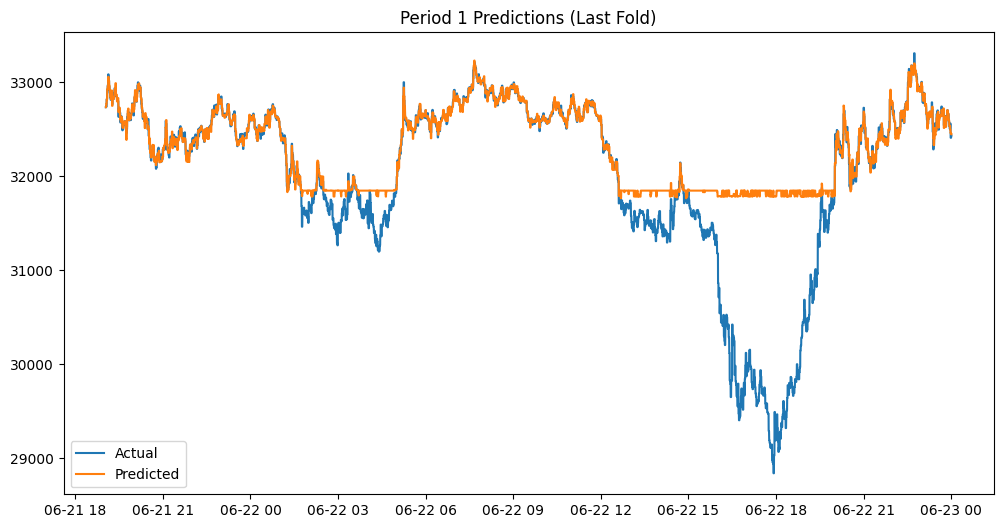


Training Model for Period 2: 2022-04-07 to 2022-08-30


Fold 1 Training:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 2 Training:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 3 Training:   0%|          | 0/100 [00:00<?, ?it/s]

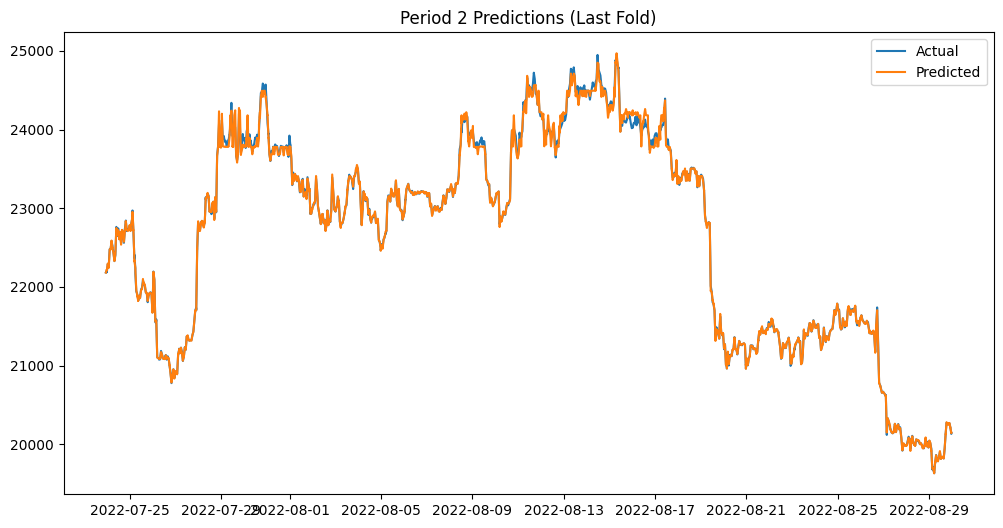


Training Model for Period 3: 2023-02-25 to 2023-03-05


Fold 1 Training:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 2 Training:   0%|          | 0/100 [00:00<?, ?it/s]

Fold 3 Training:   0%|          | 0/100 [00:00<?, ?it/s]

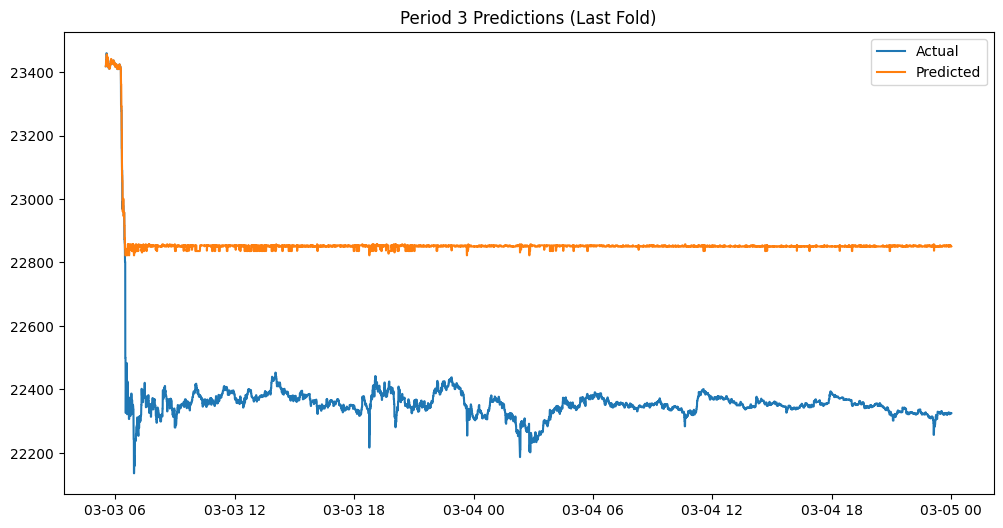

<Figure size 1200x600 with 0 Axes>

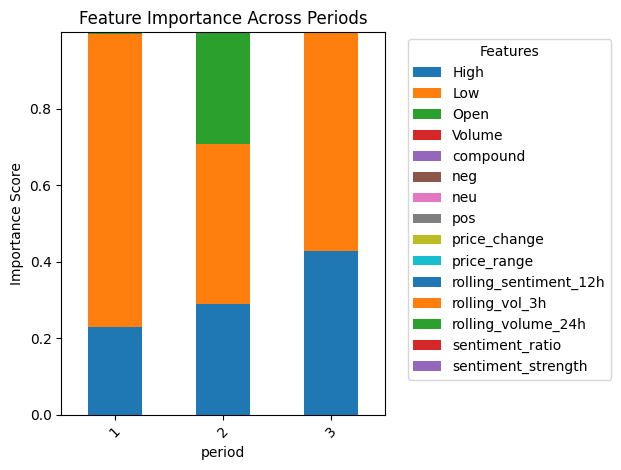


Enhanced Cross-Period Performance Comparison

Period 1 (2021-02-05 to 2021-06-23):
- Samples: 215950
- MAE: $936.19
- MAPE: 2.78%
- Volatility: $0.00

Period 2 (2022-04-07 to 2022-08-30):
- Samples: 100927
- MAE: $609.33
- MAPE: 2.65%
- Volatility: $4.83

Period 3 (2023-02-25 to 2023-03-05):
- Samples: 144760
- MAE: $164.89
- MAPE: 0.74%
- Volatility: $68.89

Volatility vs Model Performance:
   Period  Price_Volatility   Model_MAE
0       1      10247.564758  936.193713
1       2       7670.174575  609.329338
2       3        486.985725  164.892082


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

def safe_feature_engineering(df):
    """Enhanced feature engineering for your specific dataframe"""
    df = df.copy()

    # Price-based features
    df['price_range'] = df['High'] - df['Low']
    df['price_change'] = df['Close'].pct_change()

    # Sentiment features (using your VADER scores)
    df['sentiment_strength'] = df['compound'].abs()
    df['sentiment_ratio'] = (df['pos'] - df['neg']) / (df['pos'] + df['neg'] + 1e-6)  # Avoid division by zero

    # Time features
    df['time_idx'] = (df['date'] - df['date'].min()).dt.total_seconds() / 3600

    # Rolling features (3-hour window)
    windows = [3, 12, 24]  # 3h, 12h, 24h windows
    for window in windows:
        df[f'rolling_vol_{window}h'] = df['price_change'].rolling(window).std()
        df[f'rolling_volume_{window}h'] = df['Volume'].rolling(window).mean()
        df[f'rolling_sentiment_{window}h'] = df['compound'].rolling(window).mean()

    return df.dropna()

periods = [
    ('2021-02-05', '2021-06-23'),
    ('2022-04-07', '2022-08-30'),
    ('2023-02-25', '2023-03-05')
]

# Convert to datetime
combined_Data_1['date'] = pd.to_datetime(combined_Data_1['date'])

# Define features to use (based on your available columns)
final_features = ['Open', 'High', 'Low', 'Volume', 'compound', 'neg', 'neu', 'pos',
                 'price_range', 'price_change', 'sentiment_strength', 'sentiment_ratio',
                 'rolling_vol_3h', 'rolling_volume_24h', 'rolling_sentiment_12h']

# Initialize results storage
results = []
feature_importances = []

for i, (start, end) in enumerate(periods, 1):
    print(f"\n{'='*50}")
    print(f"Training Model for Period {i}: {start} to {end}")
    print(f"{'='*50}")

    # Filter data for current period
    period_mask = (combined_Data_1['date'] >= start) & (combined_Data_1['date'] <= end)
    period_data = combined_Data_1[period_mask].copy()

    # Enhanced feature engineering
    period_data = safe_feature_engineering(period_data)

    # Prepare features and target
    X = period_data[final_features]
    y = period_data['Close']

    # Time-series split validation
    tscv = TimeSeriesSplit(n_splits=3)
    fold_results = []

    for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train model with progress bar
        with tqdm(total=100, desc=f"Fold {fold} Training") as pbar:
            model = RandomForestRegressor(
                n_estimators=200,
                max_depth=15,
                min_samples_split=15,
                n_jobs=-1,
                random_state=42,
                verbose=0
            )
            model.fit(X_train, y_train)
            pbar.update(100)

        # Evaluate
        preds = model.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        mape = mean_absolute_percentage_error(y_test, preds)*100

        # Store feature importances
        fold_importances = pd.DataFrame({
            'feature': final_features,
            'importance': model.feature_importances_,
            'period': i,
            'fold': fold
        })
        feature_importances.append(fold_importances)

        fold_results.append({
            'fold': fold,
            'mae': mae,
            'mape': mape,
            'model': model,
            'test_dates': period_data.iloc[test_idx]['date']
        })

    # Store period results
    period_mae = np.mean([r['mae'] for r in fold_results])
    period_mape = np.mean([r['mape'] for r in fold_results])

    results.append({
        'period': i,
        'start': start,
        'end': end,
        'mae': period_mae,
        'mape': period_mape,
        'models': fold_results,
        'sample_size': len(period_data)
    })

    # Plot predictions for last fold
    plt.figure(figsize=(12, 6))
    last_fold = fold_results[-1]
    plt.plot(last_fold['test_dates'], y_test, label='Actual')
    plt.plot(last_fold['test_dates'], last_fold['model'].predict(X_test), label='Predicted')
    plt.title(f'Period {i} Predictions (Last Fold)')
    plt.legend()
    plt.show()

# Feature importance analysis
feature_importance_df = pd.concat(feature_importances)
mean_importance = feature_importance_df.groupby(['period', 'feature'])['importance'].mean().unstack()

plt.figure(figsize=(12, 6))
mean_importance.plot(kind='bar', stacked=True)
plt.title('Feature Importance Across Periods')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Final comparison
print("\n" + "="*50)
print("Enhanced Cross-Period Performance Comparison")
print("="*50)
for res in results:
    print(f"\nPeriod {res['period']} ({res['start']} to {res['end']}):")
    print(f"- Samples: {res['sample_size']}")
    print(f"- MAE: ${res['mae']:,.2f}")
    print(f"- MAPE: {res['mape']:.2f}%")
    print(f"- Volatility: ${res['models'][0]['model'].predict(X_test).std():.2f}")

# Volatility comparison
volatility_comparison = pd.DataFrame([
    {
        'Period': i,
        'Price_Volatility': combined_Data_1[(combined_Data_1['date'] >= start) &
                               (combined_Data_1['date'] <= end)]['Close'].std(),
        'Model_MAE': res['mae']
    }
    for i, ((start, end), res) in enumerate(zip(periods, results), 1)
])

print("\nVolatility vs Model Performance:")
print(volatility_comparison)

In [ ]:
Price.shape

(6943080, 7)